<a href="https://colab.research.google.com/github/624mihir/CardioRisk/blob/main/cardioRisk_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents

>>[Step 1: Data Overview — Uncovering Key Health Indicators](#scrollTo=SX9lNhjR7WW7)

>>[Step 2: Data Schema and Feature Overview](#scrollTo=-ESW5xKzWq9Z)

>>>[Feature Summary](#scrollTo=JBf_T4ZsNGon)

>>>[Dataset Overview:](#scrollTo=roS4INeI7sHZ)

>>[Step 3: Exploratory Data Analysis (EDA)](#scrollTo=rfom8d1x_oSI)

>>>[Observation:](#scrollTo=zqpDIM2EAaGg)

>>>[Feature Uniqueness Summary](#scrollTo=RJW7X0JXPsMw)

>>>[Observations:](#scrollTo=R7EbAvUnC2mC)

>>>[Key Observations:](#scrollTo=d4fc9577)

>>>[Key Observations:](#scrollTo=4sDDcMxJodiP)

>>[Outliers in Numerical Features Across Lifestyle Categories](#scrollTo=nH-EvnnUr4QT)

>>>[Observations:](#scrollTo=r_1adLMGD94q)

>>>[Alcohol & Smoking Analysis:](#scrollTo=r_1adLMGD94q)

>>[Step 4: Statistical Tests Summary](#scrollTo=Beedh0qn4svB)

>>[Step 5: Machine Learning — Predicting Heart Disease](#scrollTo=NXcVnQDmkOt0)

>>>[Model Performance Summary](#scrollTo=gU46l5lnFjvN)

>>>[Final Conclusion](#scrollTo=dA599jlub5Ev)

>>[10 Evidence-Based Recommendations to Prevent Cardiovascular Disease](#scrollTo=-AJgXAw-gqJe)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries and Loading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install missingno
!pip install lightgbm
import missingno as msno
from scipy import stats

In [3]:
train = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/heart_2020_dataset.csv')

## Step 1: Data Overview — Uncovering Key Health Indicators


To begin our analysis, we examine the distribution and basic statistics of key numerical columns:  
- **BMI (Body Mass Index)**
- **PhysicalHealth** (Days physically unwell in last 30)
- **MentalHealth** (Days mentally unwell in last 30)
- **SleepTime** (Average daily sleep in hours)

These insights help identify skewness, outliers, and baseline health metrics of the population.


In [7]:
train.describe().style.background_gradient(cmap = "YlGnBu")

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.371710,3.898366,7.097075
std,6.356100,7.950850,7.955235,1.436007
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.340000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


 Insights:

*   BMI ranges from 12 to 94.85, which suggests the
presence of extreme outliers (both underweight and obese).
*  Both PhysicalHealth and MentalHealth have a mean of ~3–4 days of poor health, but a max of 30 days—this suggests some respondents reported continuous health issues.
*   SleepTime ranges from 1 to 24 hours, with a mean of ~7.1 hrs—again indicating possible reporting errors or extreme habits.










Data distribution and highlight outliers :

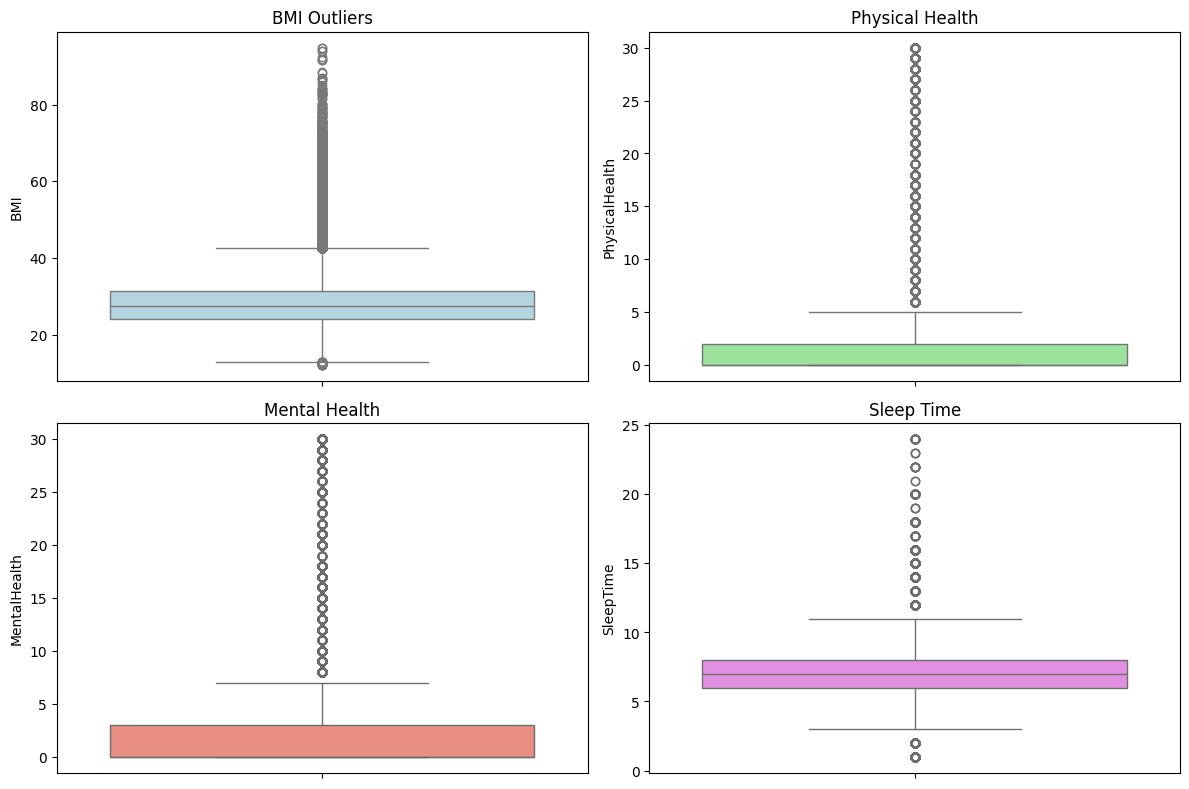

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(train['BMI'], ax=axs[0, 0], color='lightblue')
axs[0, 0].set_title("BMI Outliers")

sns.boxplot(train['PhysicalHealth'], ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title("Physical Health")

sns.boxplot(train['MentalHealth'], ax=axs[1, 0], color='salmon')
axs[1, 0].set_title("Mental Health")

sns.boxplot(train['SleepTime'], ax=axs[1, 1], color='violet')
axs[1, 1].set_title("Sleep Time")

plt.tight_layout()
plt.show()

## Step 2: Data Schema and Feature Overview


Before diving into the analysis, it's important to understand what each column represents in the dataset. The data consists of responses from 319,795 individuals, collected across 18 features related to personal health, lifestyle habits, and demographics.


In [4]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


### Feature Summary

- **HeartDisease**: *(Target Variable)* Indicates whether the individual has ever been diagnosed with heart disease.
- **BMI**: Body Mass Index, a numeric value representing weight relative to height.
- **Smoking**: Whether the person has smoked at least 100 cigarettes in their lifetime.
- **AlcoholDrinking**: Whether the individual consumes alcohol heavily.
- **Stroke**: Indicates if the person has ever had a stroke.
- **PhysicalHealth**: Number of days in the past 30 days when physical health was not good.
- **MentalHealth**: Number of days in the past 30 days when mental health was not good.
- **DiffWalking**: Difficulty in walking or climbing stairs.
- **Sex**: Gender of the individual.
- **AgeCategory**: Categorical age range (e.g., 55-59, 60-64).
- **Race**: Ethnic background of the person.
- **Diabetic**: Whether the person has been diagnosed with diabetes.
- **PhysicalActivity**: Whether the individual participated in any physical activity in the past month.
- **GenHealth**: Self-reported general health status.
- **SleepTime**: Average number of hours of sleep in a 24-hour period.
- **Asthma**: Whether the person has been diagnosed with asthma.
- **KidneyDisease**: Whether the person has kidney disease.
- **SkinCancer**: Whether the person has been diagnosed with skin cancer.


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### Dataset Overview:

- There are **319,795 rows** and **18 columns**.
- All columns are complete — no missing values.
- Most columns are **categorical**, with only a few numerical features:
  - `BMI`, `PhysicalHealth`, `MentalHealth`, `SleepTime`
- Target variable is `HeartDisease`, which is binary (`Yes`/`No`)

> No null values means we can move forward without imputation. But we’ll need to **encode categorical variables** for further analysis or modeling.


*Note:* Since a majority of features are binary or ordinal, this dataset is well-suited for both descriptive analytics and simple predictive modeling using classification techniques.


## Step 3: Exploratory Data Analysis (EDA)

---



To ensure accurate insights and modeling, we first check for **missing values** in the dataset. A complete dataset eliminates the need for imputation and simplifies preprocessing.

Below is a nullity matrix showing the presence (or absence) of missing data in each feature:


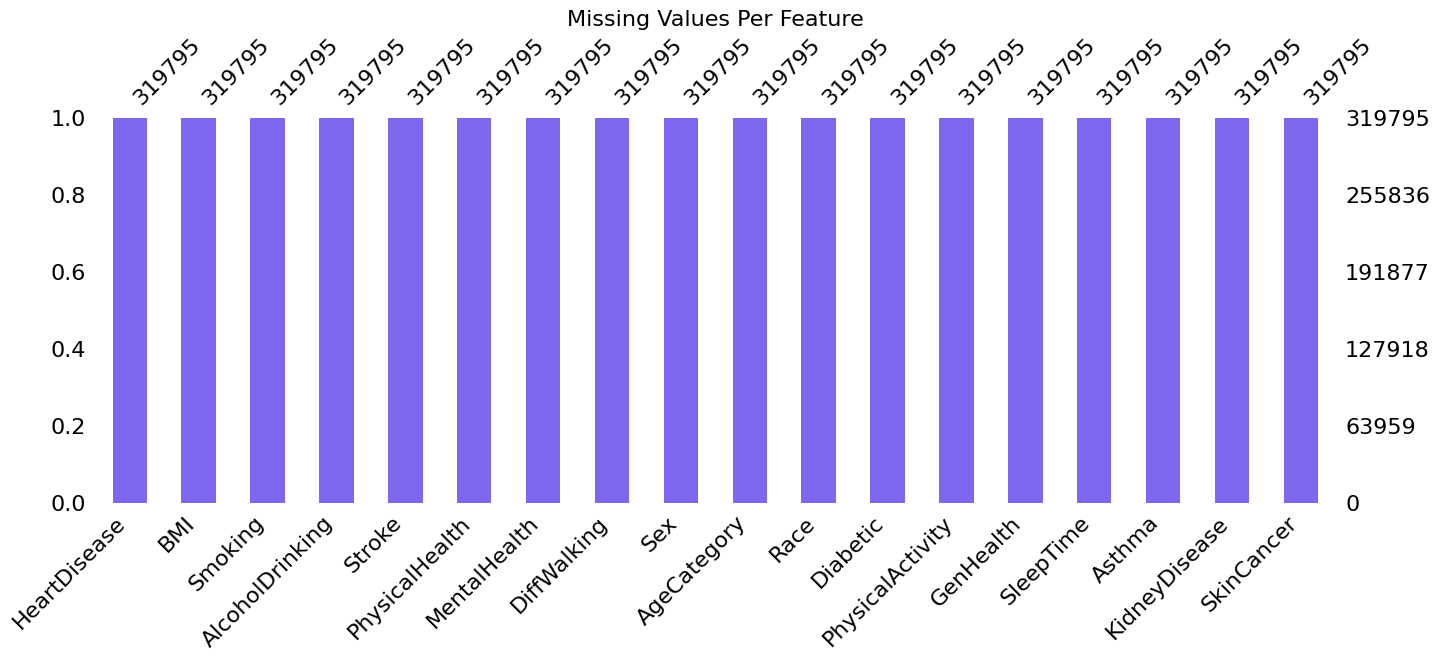

In [8]:
msno.bar(train, figsize=(16, 5), color="#7B68EE")
plt.title("Missing Values Per Feature", fontsize=16)
plt.show()

### Observation:
- Every column has **319,795 non-null values**, confirming that there are **no missing entries** in this dataset.
- We can proceed without any imputation or deletion steps, which streamlines our analysis.

*Note:* Although there are no missing values, it's still important to check for:
- Inconsistent formats or unexpected values (e.g., `"Unknown"`, `"Prefer not to say"`)
- Skewed distributions or sparsely filled categories



Understanding the distribution of our target variable (`HeartDisease`) helps us assess class imbalance — which can significantly affect modeling performance later.

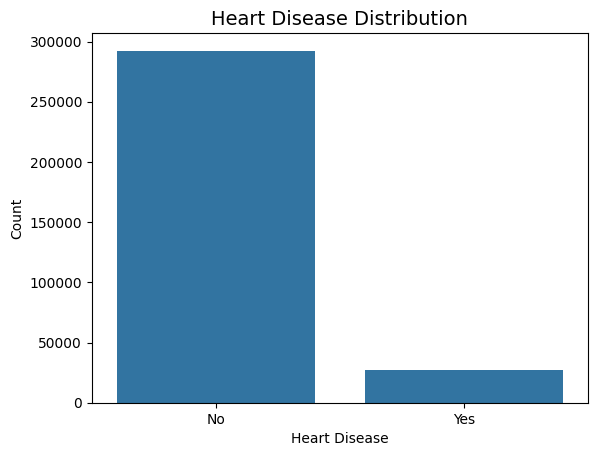

In [9]:
sns.countplot(data=train, x='HeartDisease')
plt.title("Heart Disease Distribution", fontsize=14)
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

Insights:
*   The dataset is highly imbalanced.
*   A large majority of individuals do not have heart disease.
*   Only a small portion have been diagnosed with heart disease.









In [10]:
# Percentage distribution
hd_counts = train['HeartDisease'].value_counts(normalize=True) * 100
print(hd_counts)


HeartDisease
No     91.440454
Yes     8.559546
Name: proportion, dtype: float64


*Note* :
Class imbalance is common in medical datasets. If we plan to apply machine learning later, we’ll need to use techniques like:
* Resampling (oversampling/undersampling)
* Class weights
* Evaluation metrics beyond accuracy (e.g., F1-score)

Before diving deeper, it's important to classify our features as **categorical** or **numerical**, and understand how unique or diverse their values are.

Let's look at unique values in **categorical** objects

In [11]:
for col in train.columns:
    print(f"🔹 {col} — {train[col].nunique()} unique values")


🔹 HeartDisease — 2 unique values
🔹 BMI — 3604 unique values
🔹 Smoking — 2 unique values
🔹 AlcoholDrinking — 2 unique values
🔹 Stroke — 2 unique values
🔹 PhysicalHealth — 31 unique values
🔹 MentalHealth — 31 unique values
🔹 DiffWalking — 2 unique values
🔹 Sex — 2 unique values
🔹 AgeCategory — 13 unique values
🔹 Race — 6 unique values
🔹 Diabetic — 4 unique values
🔹 PhysicalActivity — 2 unique values
🔹 GenHealth — 5 unique values
🔹 SleepTime — 24 unique values
🔹 Asthma — 2 unique values
🔹 KidneyDisease — 2 unique values
🔹 SkinCancer — 2 unique values


### Feature Uniqueness Summary

- Most features are **binary categorical** (e.g., `Smoking`, `Stroke`, `Asthma`)
- Features like `AgeCategory`, `Race`, and `GenHealth` offer **ordinal/categorical variation**
- `BMI`, `PhysicalHealth`, `MentalHealth`, and `SleepTime` are treated as **numerical**


In [12]:
numeric_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
categorical_features = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                        'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
                        'KidneyDisease', 'SkinCancer']

To understand the distribution of continuous features, we use four complementary techniques:
- **Distribution Plot**: To observe skewness and modality
- **Boxplot**: To detect presence of outliers
- **Violin Plot**: To combine density and spread visually
- **Q-Q Plot**: To assess normality

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

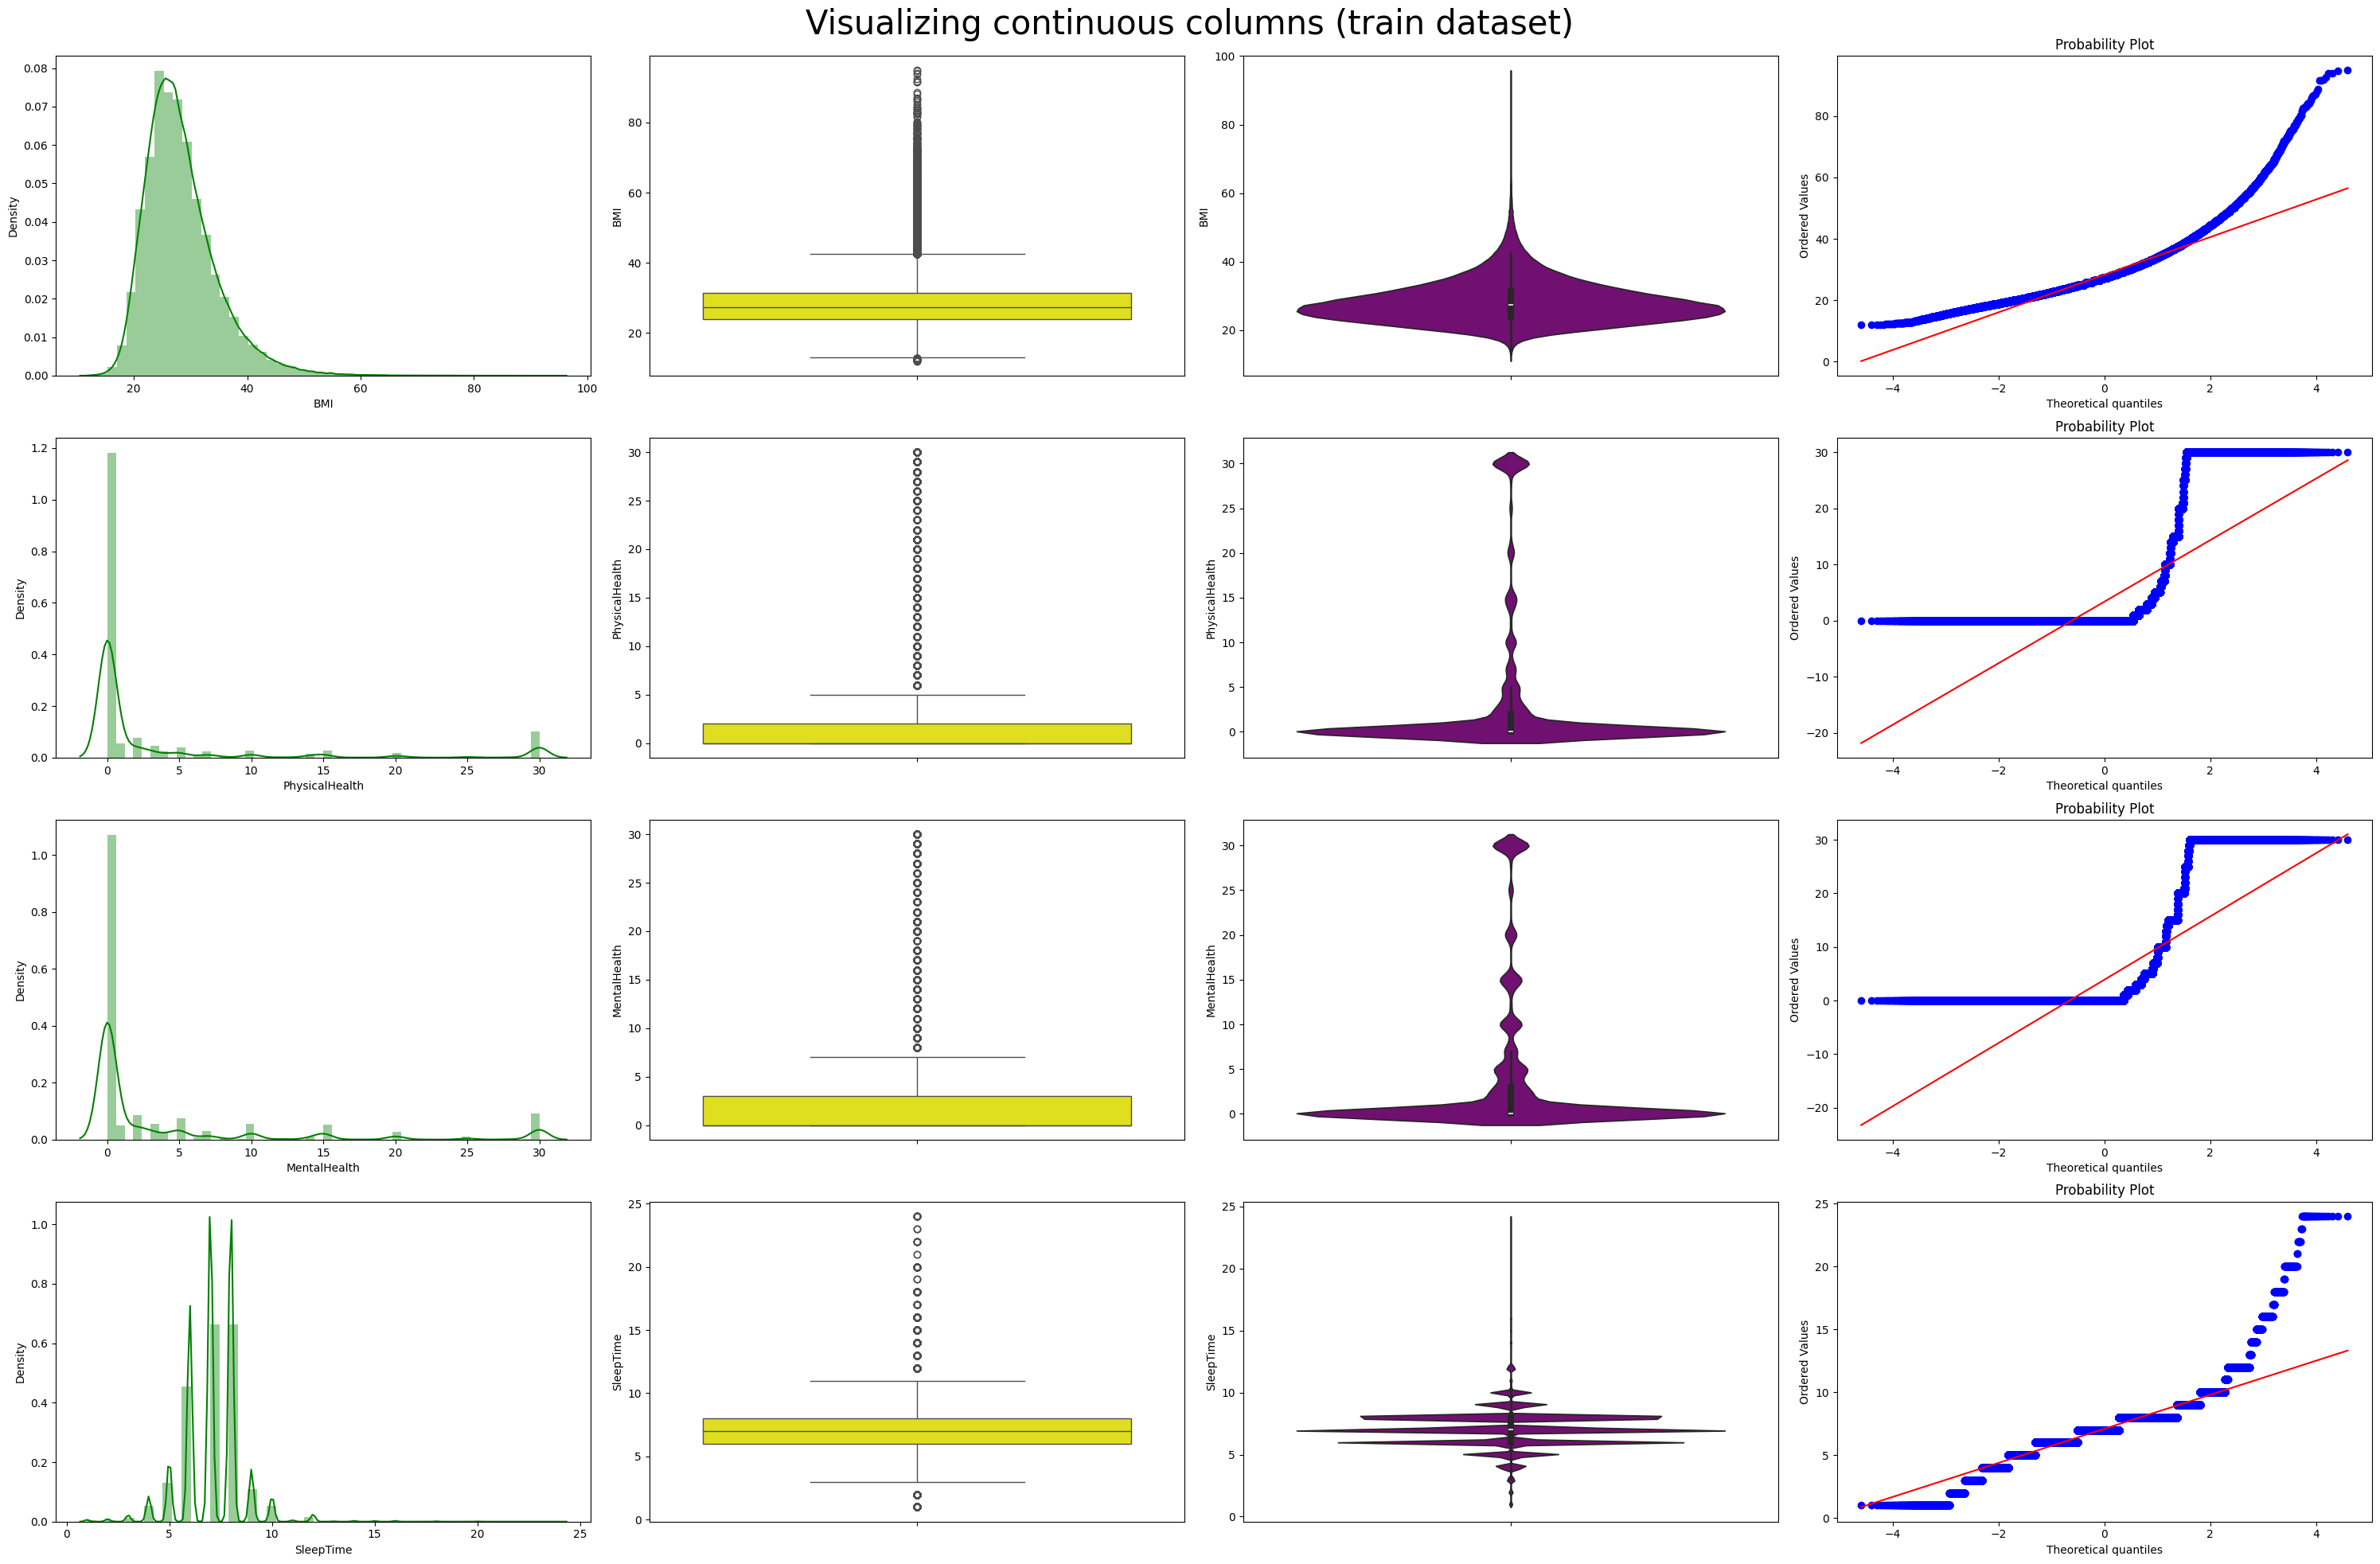

In [13]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric_features),4,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(train[i],ax=ax[index,0],color='green')
    sns.boxplot(train[i],ax=ax[index,1],color='yellow')
    sns.violinplot(train[i],ax=ax[index,2],color='purple')
    stats.probplot(train[i],plot=ax[index,3])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

### Observations:

- **BMI** is approximately **normally distributed**, with a mean around 28. However, there are noticeable outliers (above 50).
- **PhysicalHealth** and **MentalHealth** are highly **right-skewed**, with many respondents reporting zero unhealthy days, but some reporting all 30.
- **SleepTime** is **multi-modal**, with spikes around 6–8 hours, and several unusual values near 0 or 24.

> These findings will guide our feature transformation strategy — for example:
> - Apply **log/square root transformation** to reduce skewness
> - Consider **capping outliers** to prevent model distortion
> - Possibly bin SleepTime or Health scores into ranges (e.g., good/moderate/poor)


To better understand which lifestyle, demographic, or medical factors are associated with heart disease, we plot **HeartDisease counts across all categorical variables**.

This helps us visually compare the ratio of heart disease (`Yes` vs `No`) for each category.


In [14]:
categorical_features = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
    'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
    'Asthma', 'KidneyDisease', 'SkinCancer'
]

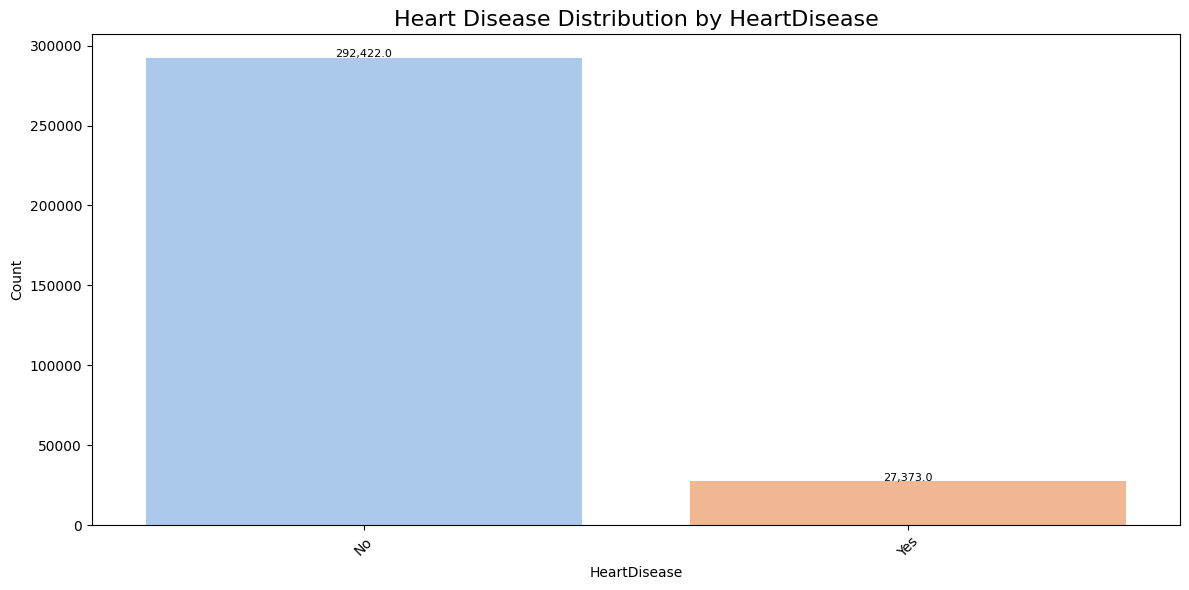

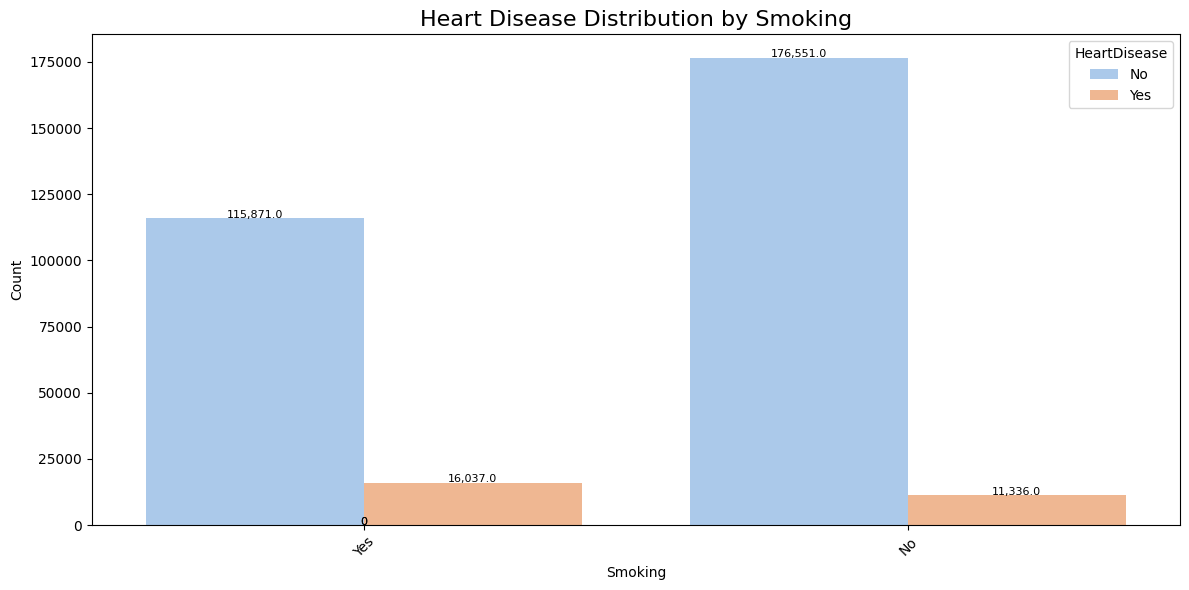

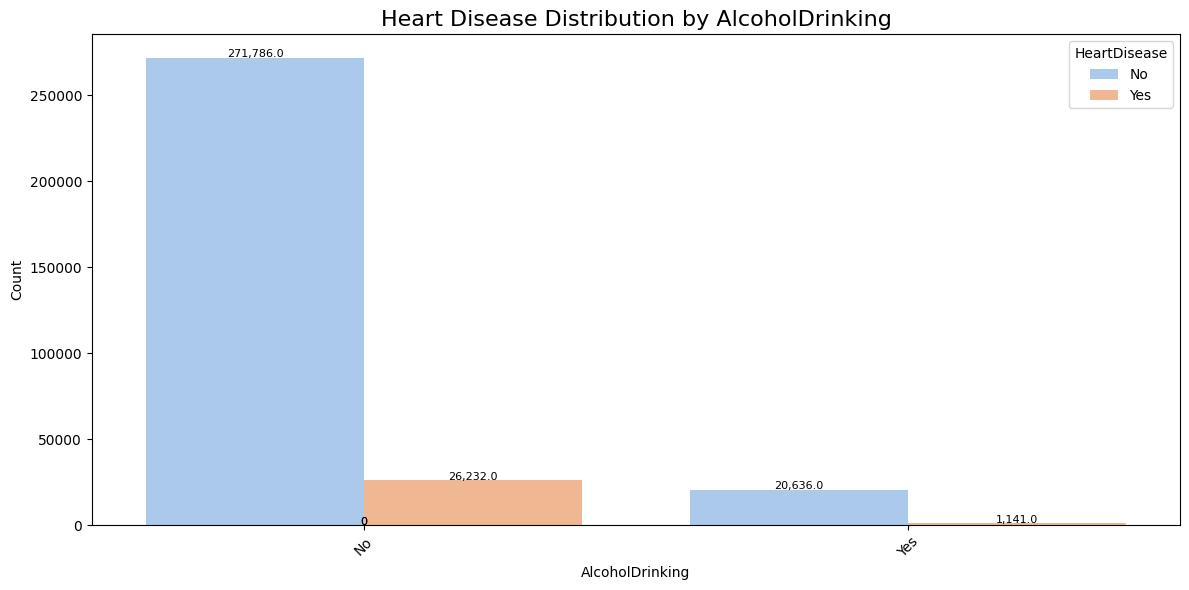

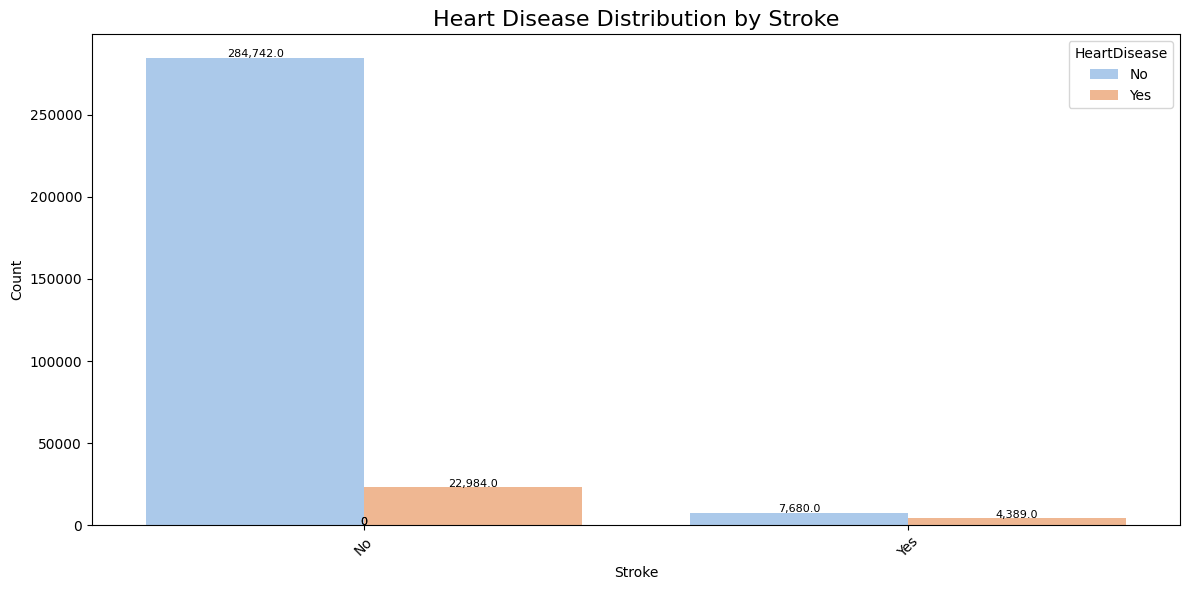

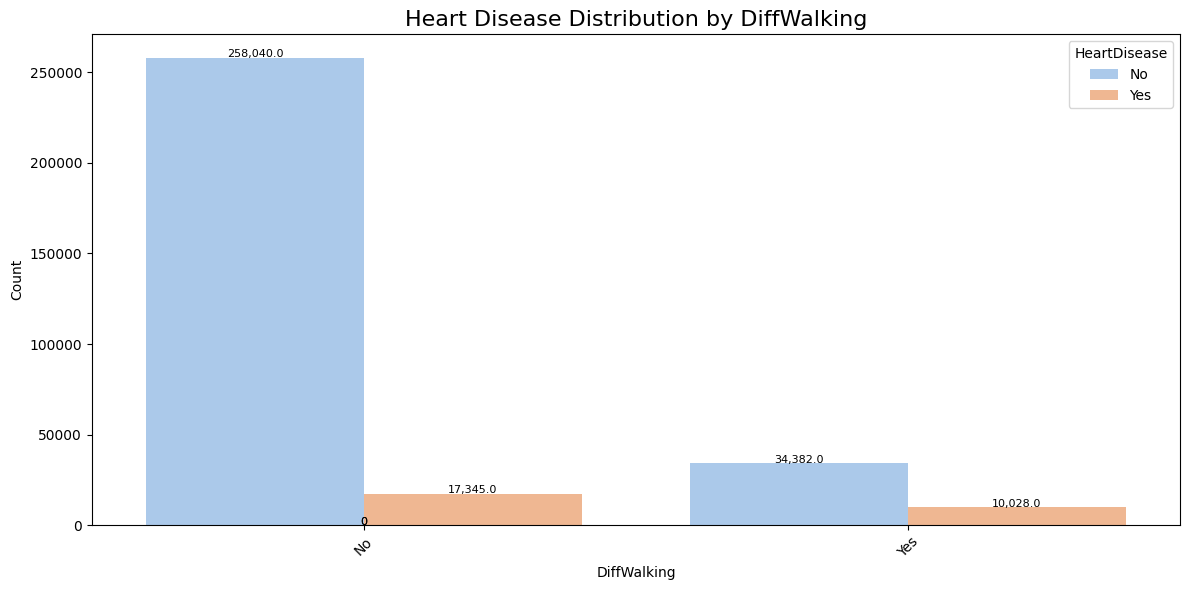

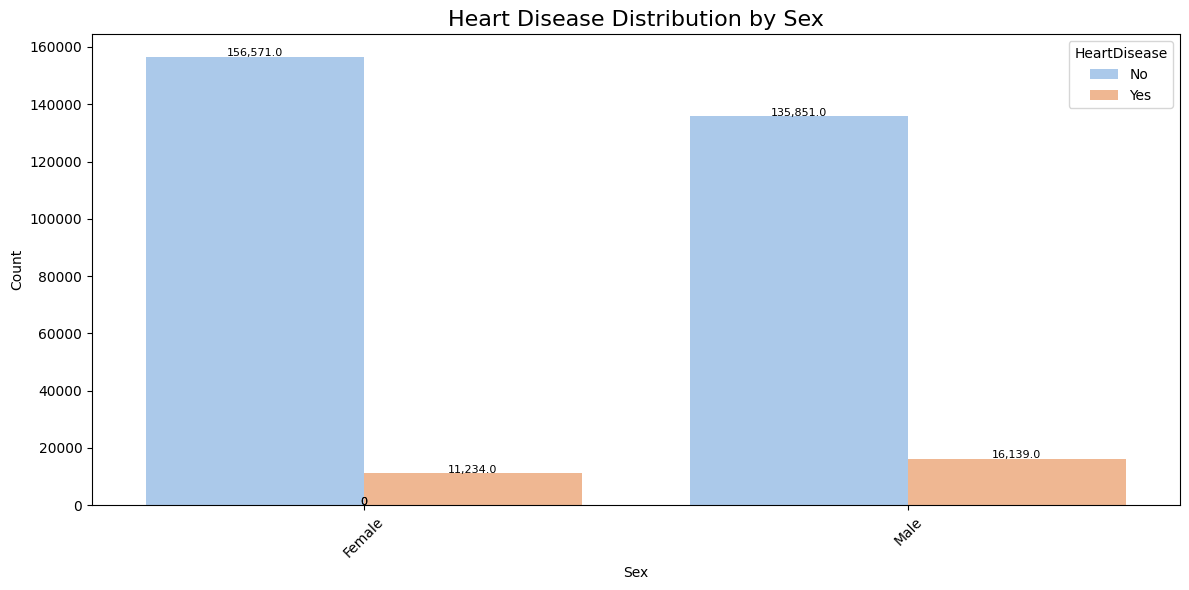

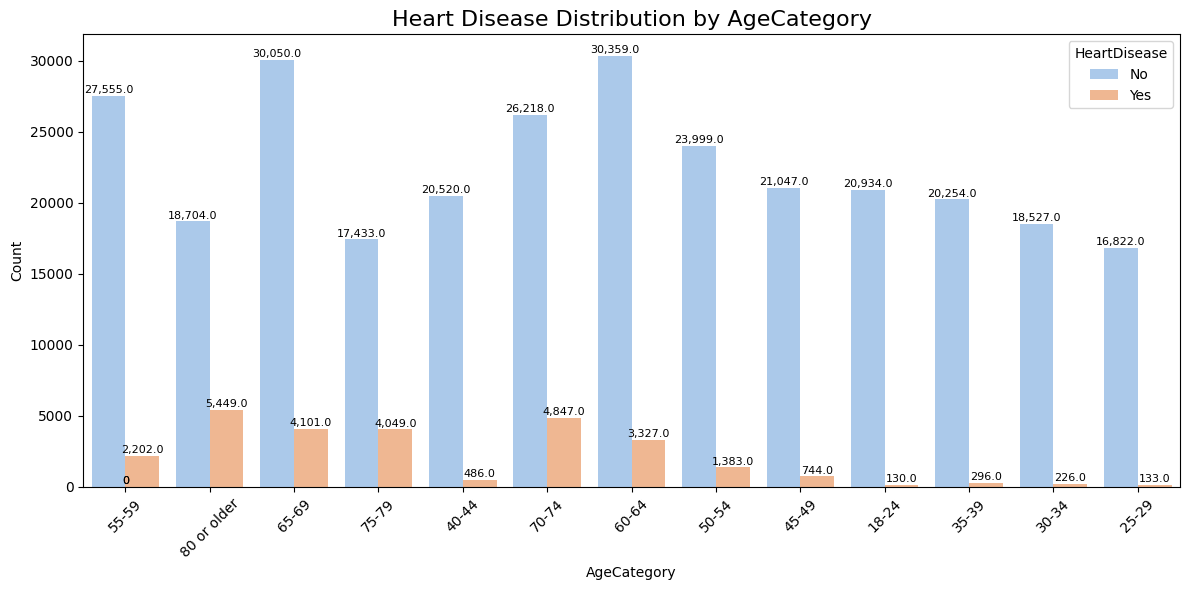

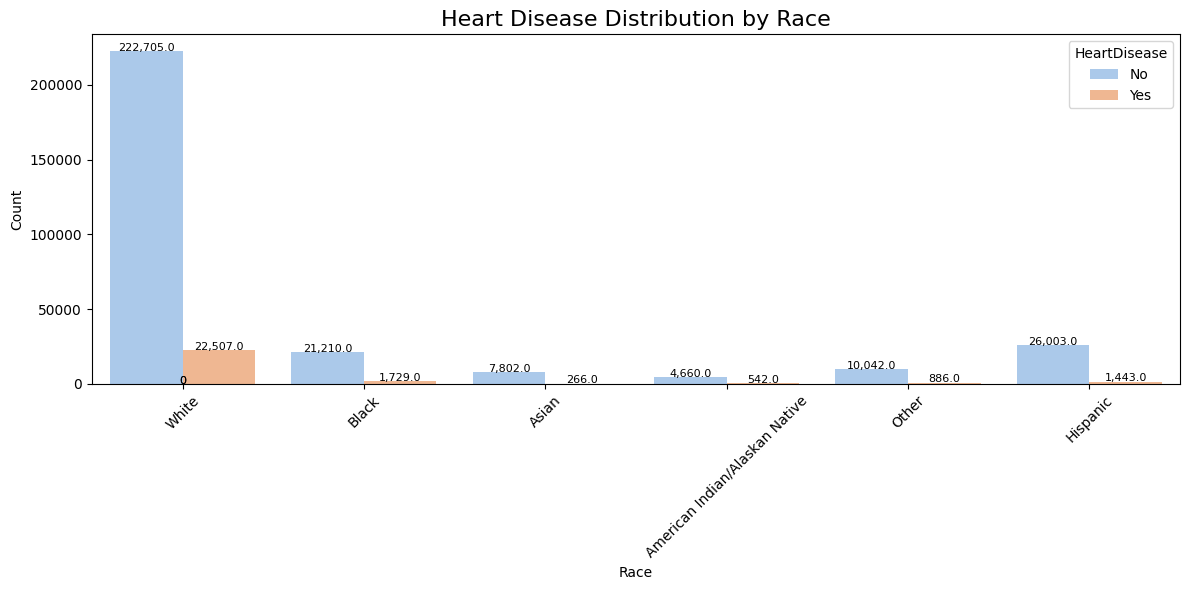

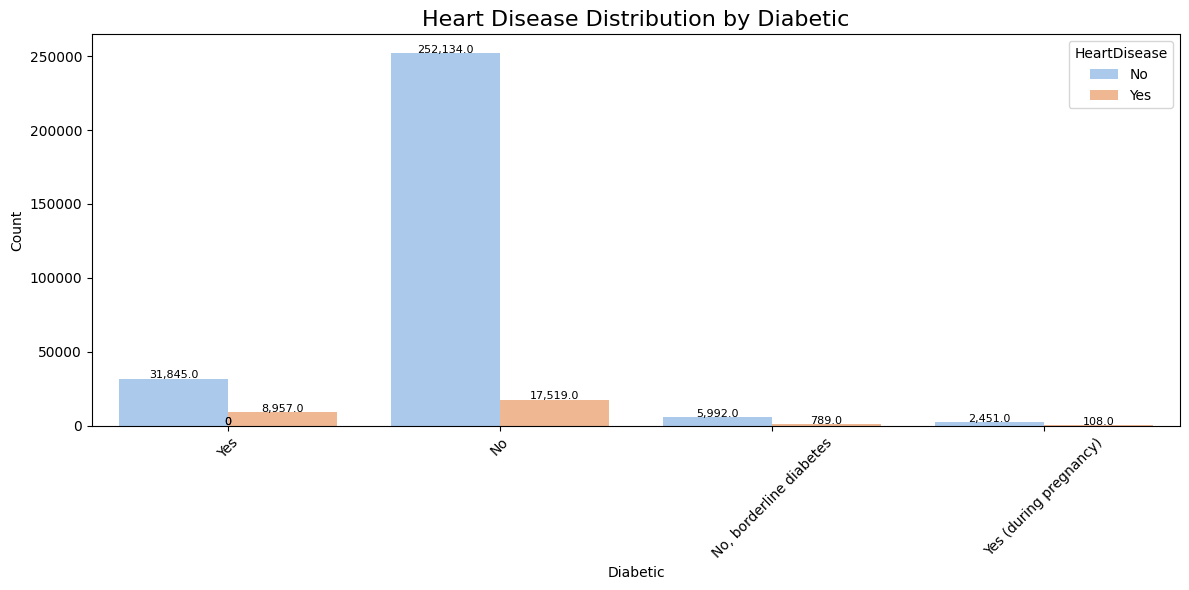

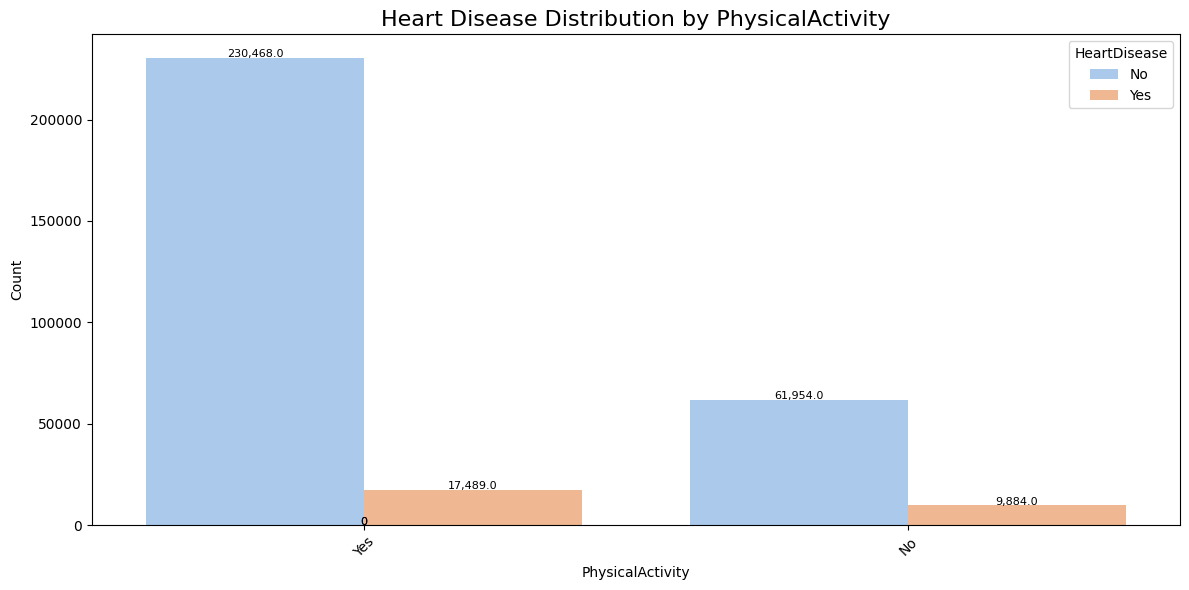

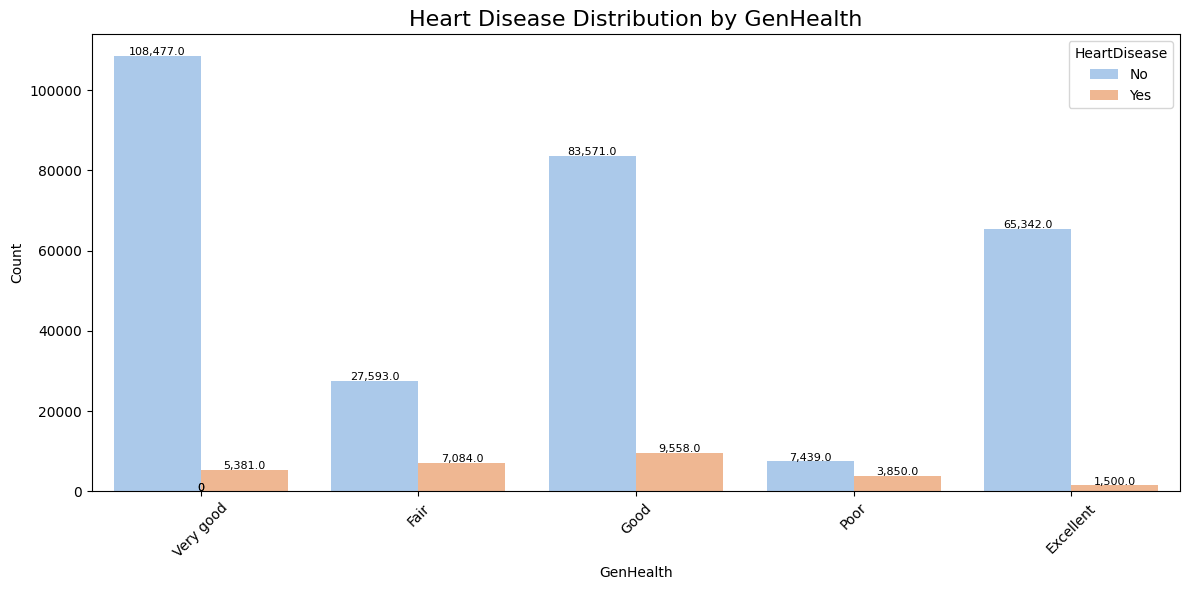

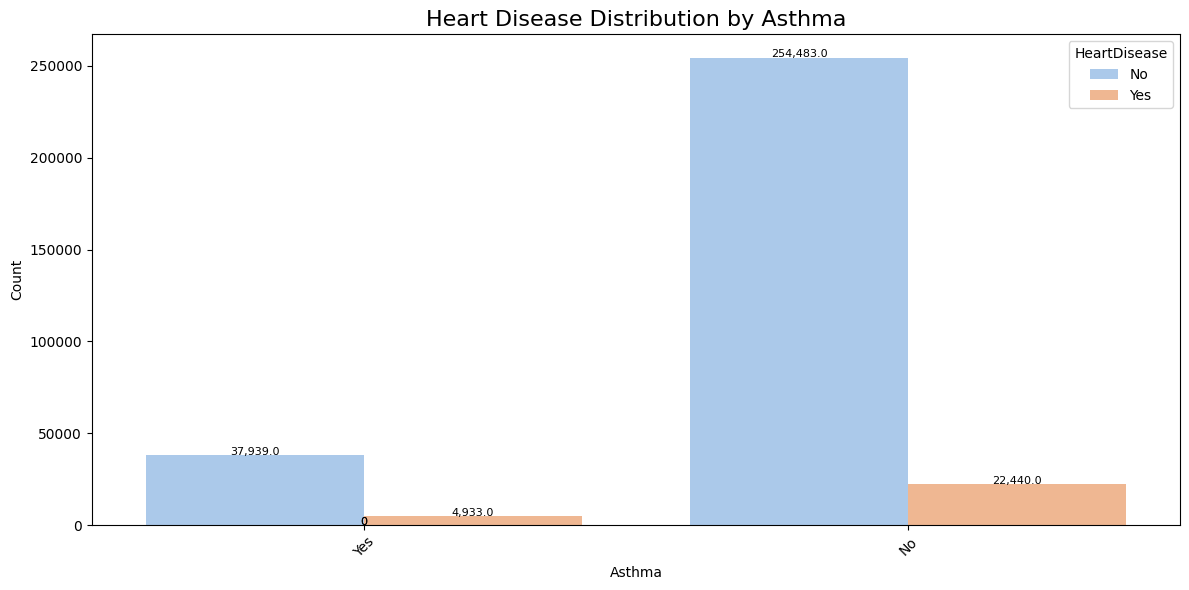

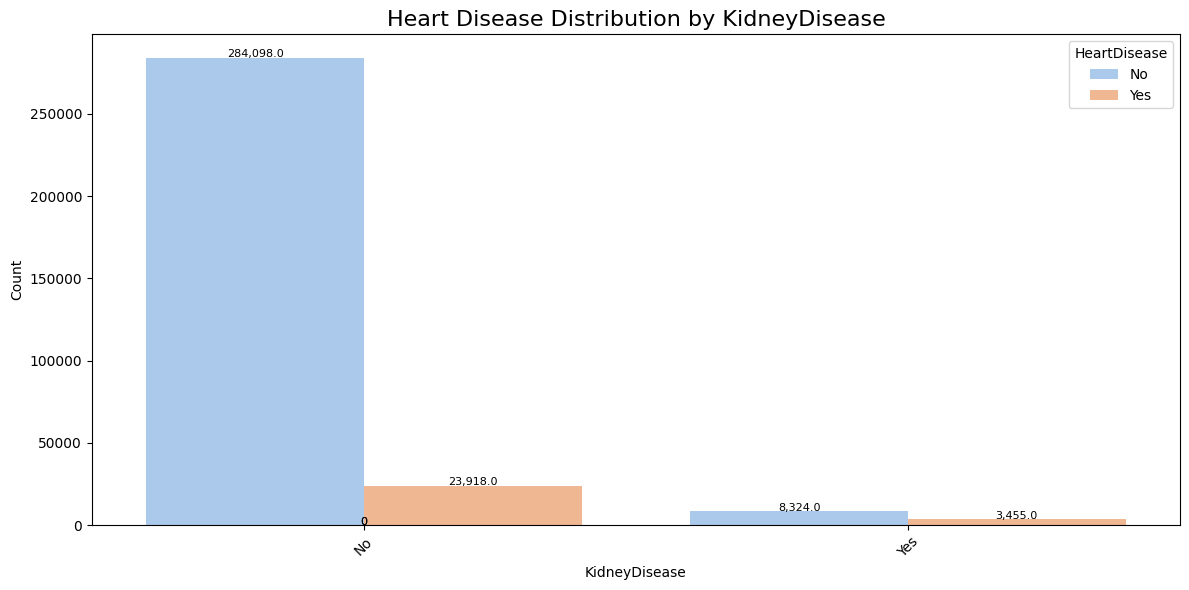

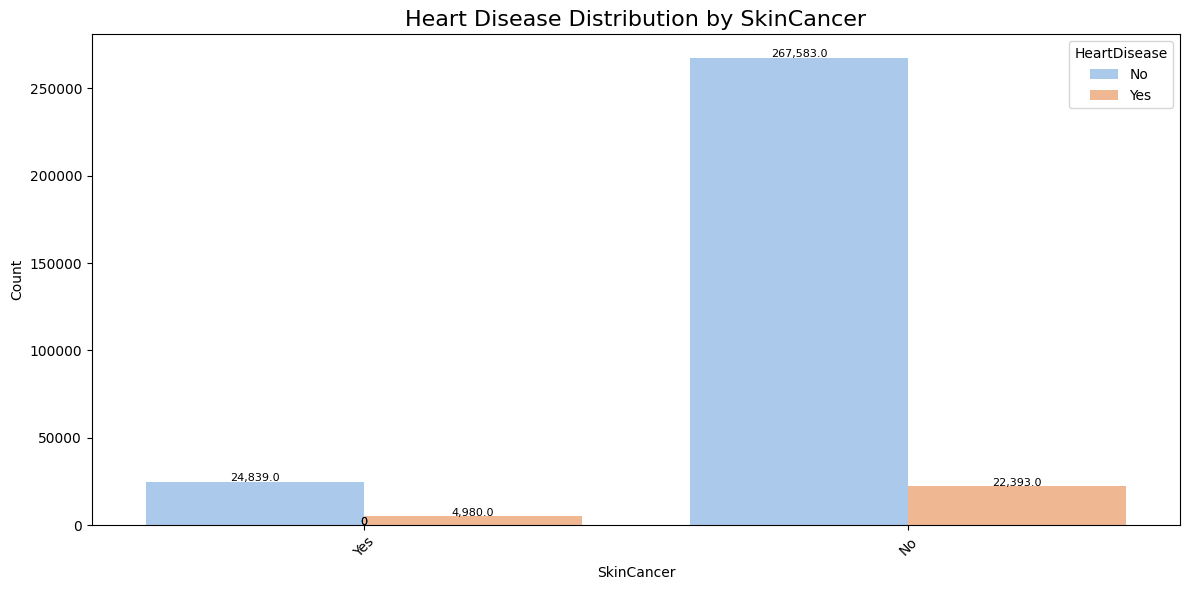

In [15]:
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=train, x=feature, hue='HeartDisease', palette='pastel')
    ax.set_title(f'Heart Disease Distribution by {feature}', fontsize=16)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

    # Correct way to rotate tick labels
    plt.xticks(rotation=45)

    # Add value labels on bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 200, f'{height:,}', ha="center", fontsize=8)

    plt.tight_layout()
    plt.show()


### Key Observations:

- **Sex**: A higher proportion of males are affected by heart disease.
- **AgeCategory**: Risk increases significantly with age, especially after 50.
- **Smoking / AlcoholDrinking / PhysicalActivity**: Lifestyle factors clearly impact heart disease likelihood.
- **GenHealth**: People who report "Poor" general health have much higher heart disease rates.
- **Diabetic / KidneyDisease / Stroke**: Clear medical risk indicators.
- **DiffWalking**: Strong correlation with heart disease — could be a useful feature.

> *Note:*  These visuals offer strong hints at what features may be predictive. But correlation ≠ causation — we'll validate with statistics and modeling later.


Understanding how categorical features are distributed between males and females helps uncover potential demographic imbalances and feature importance for heart disease prediction.

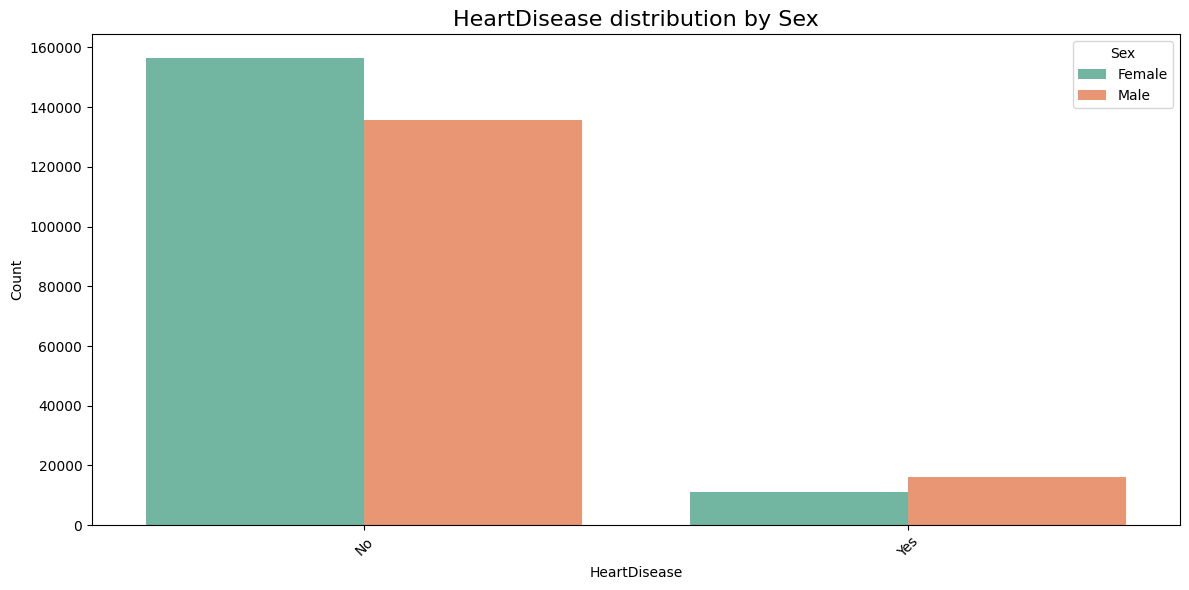

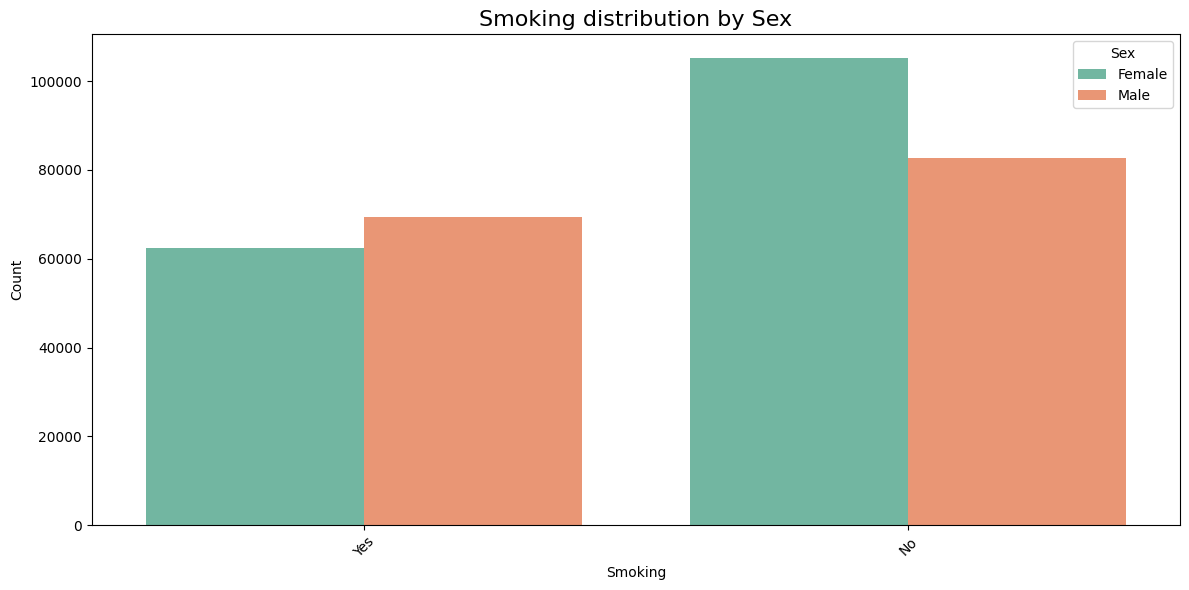

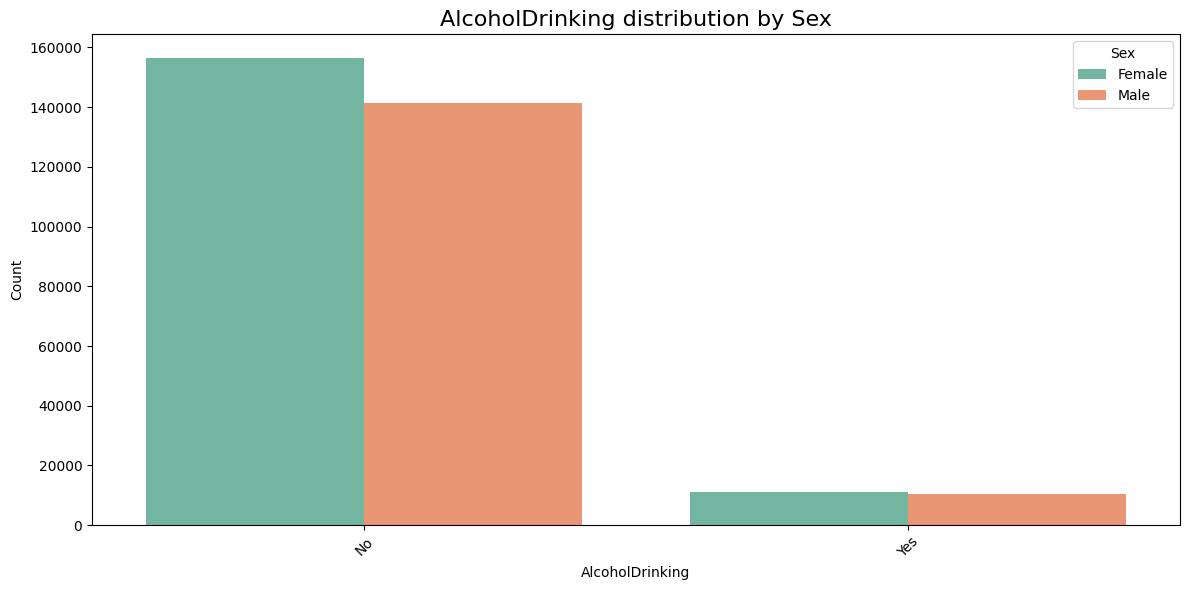

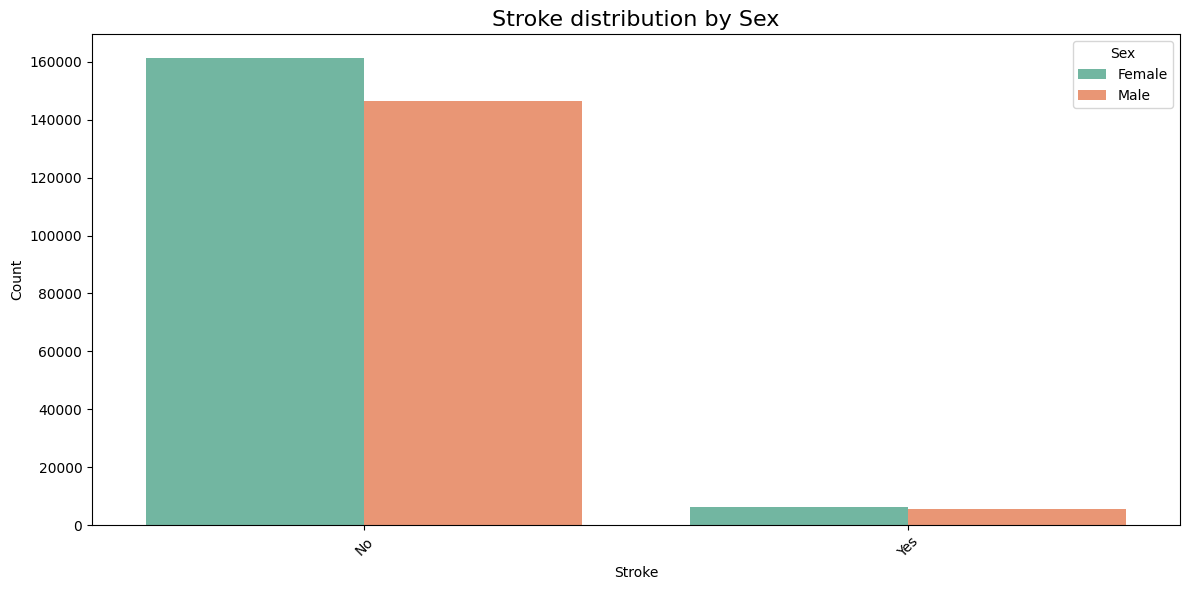

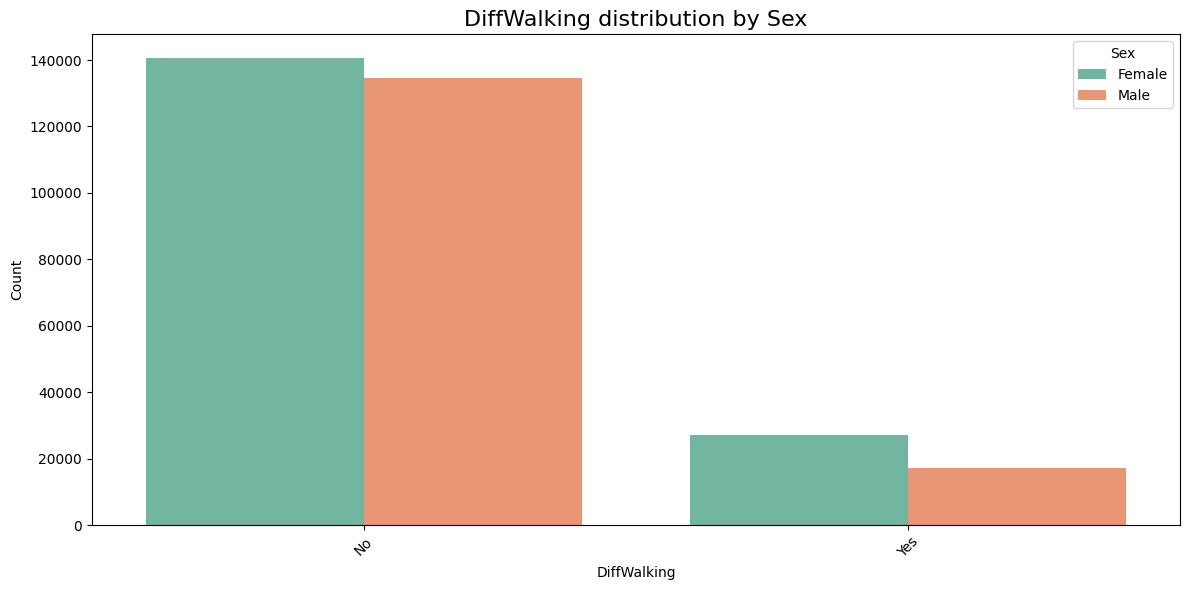

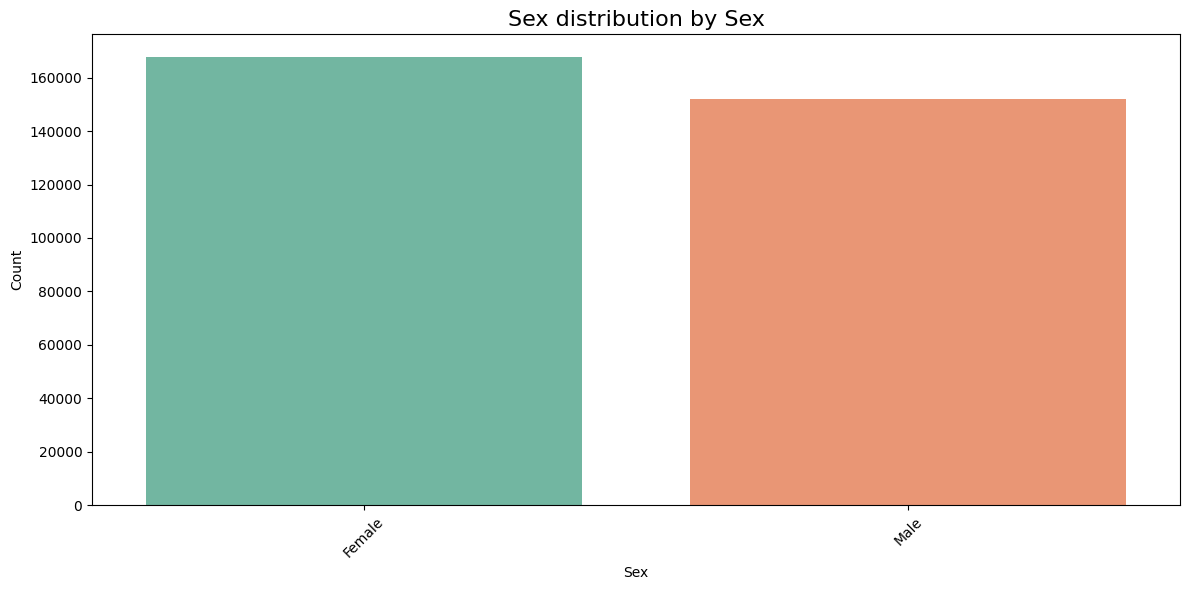

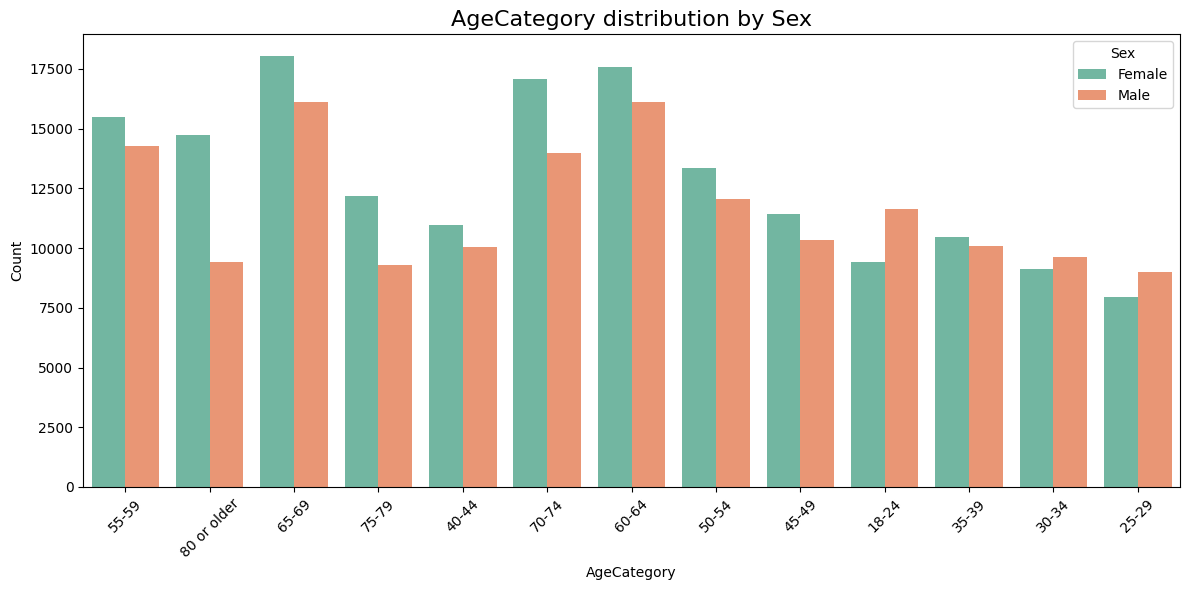

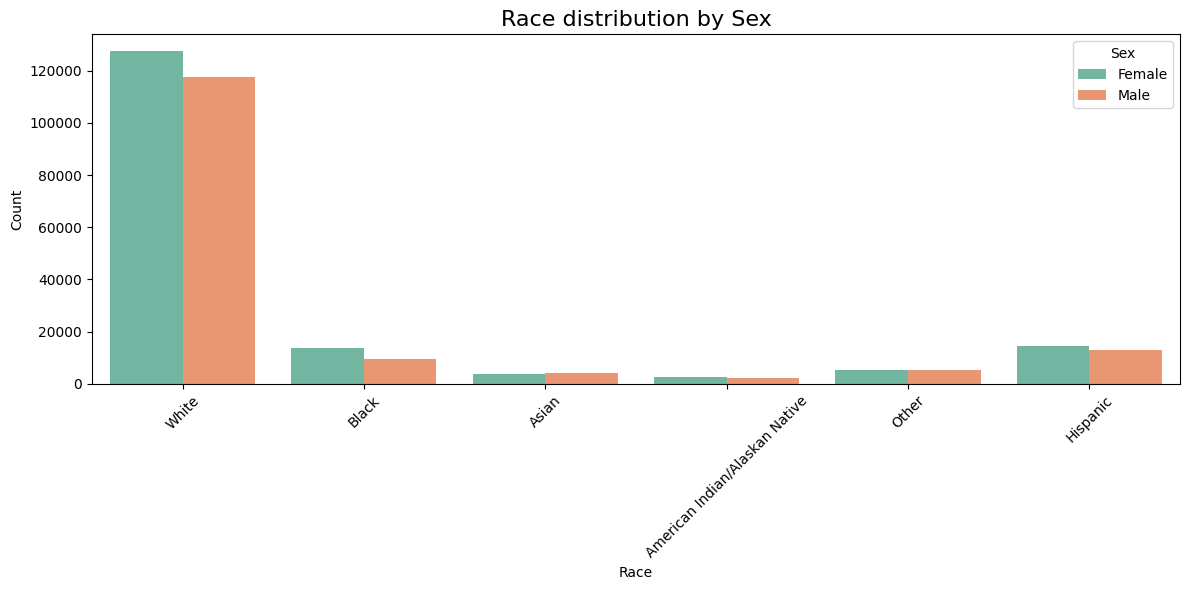

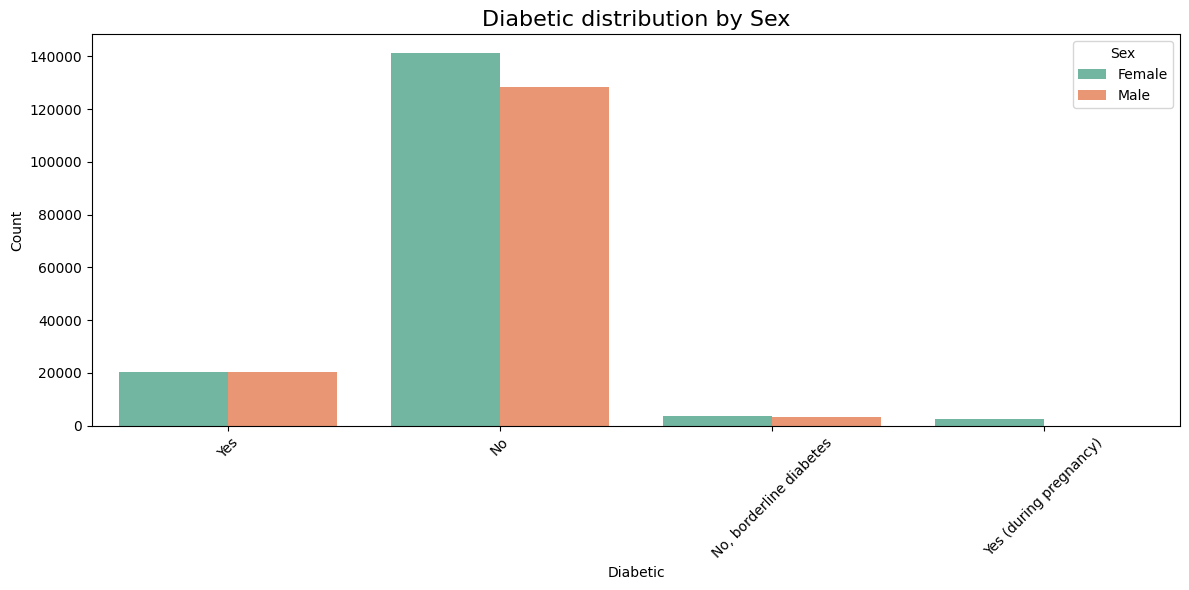

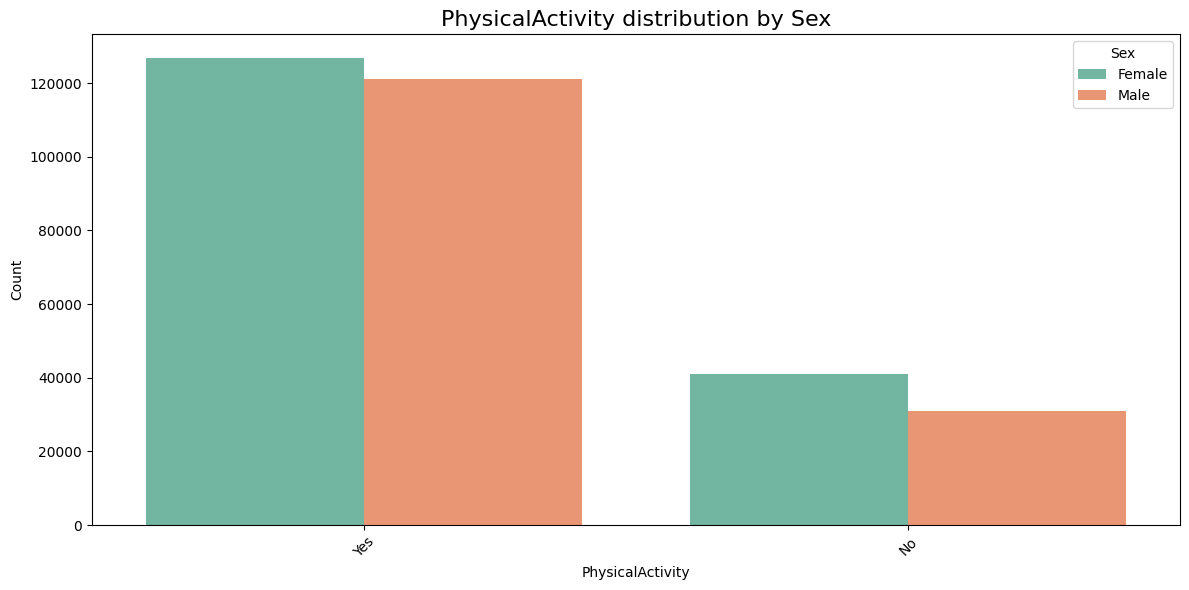

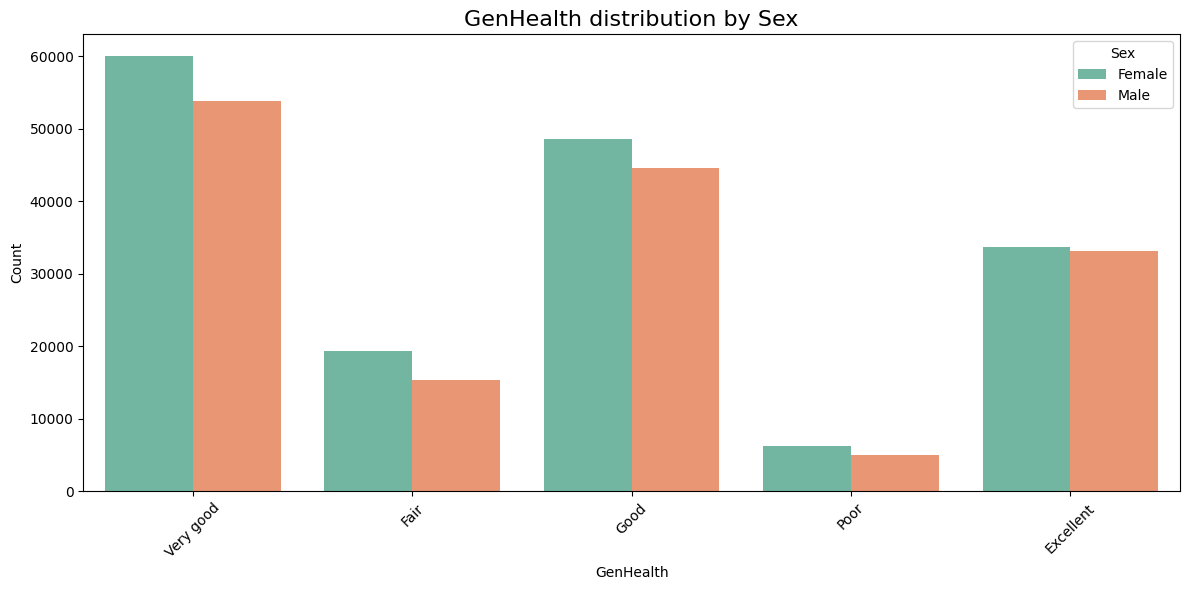

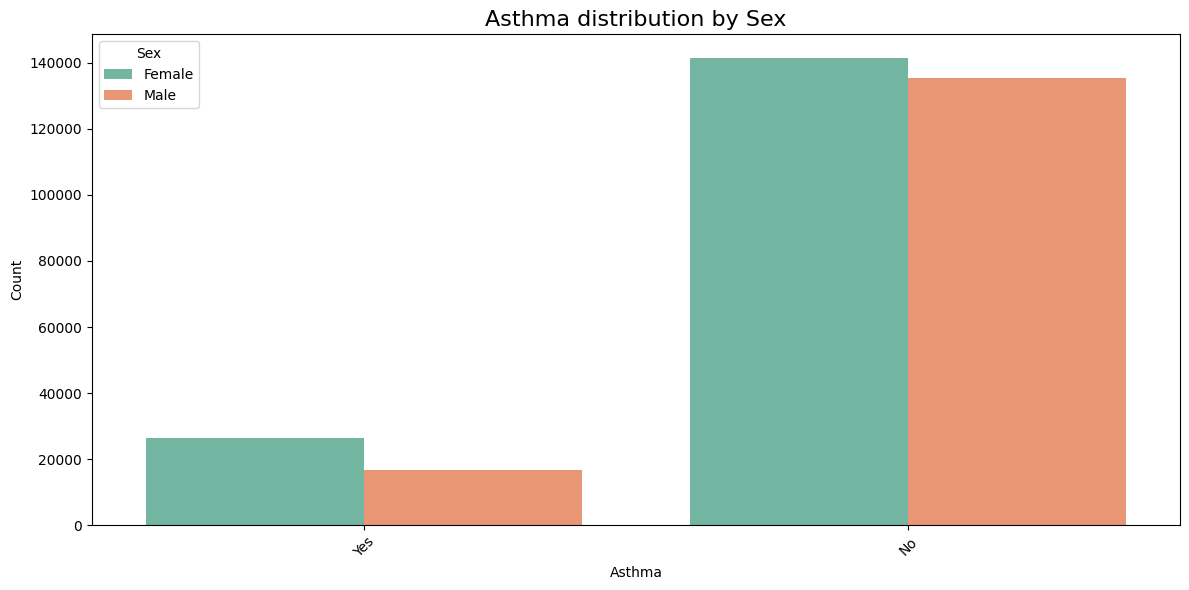

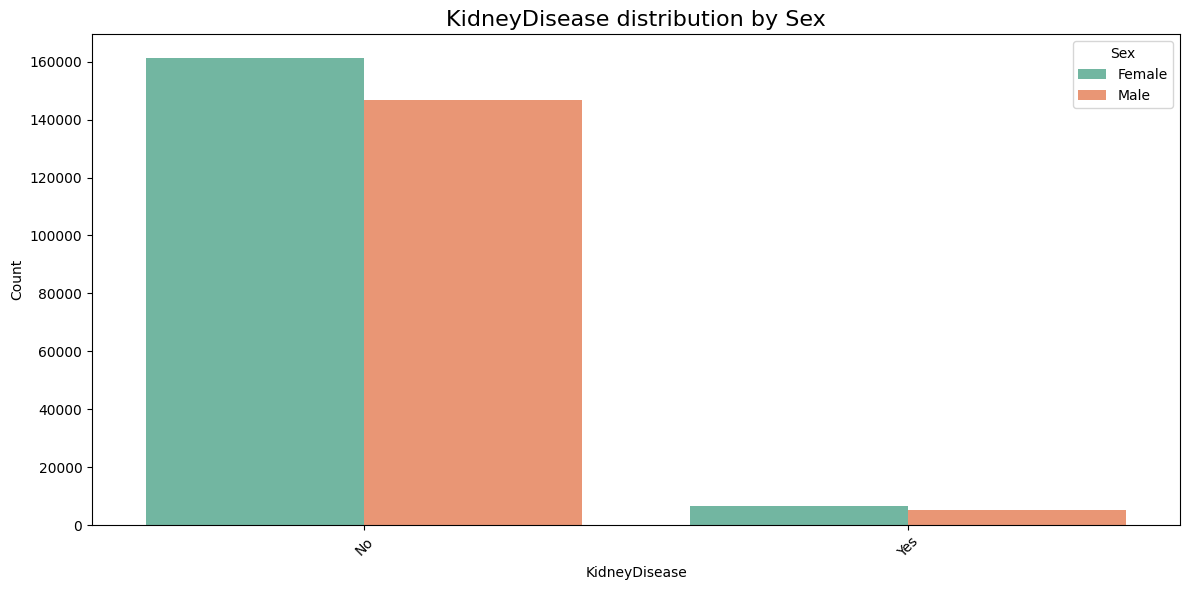

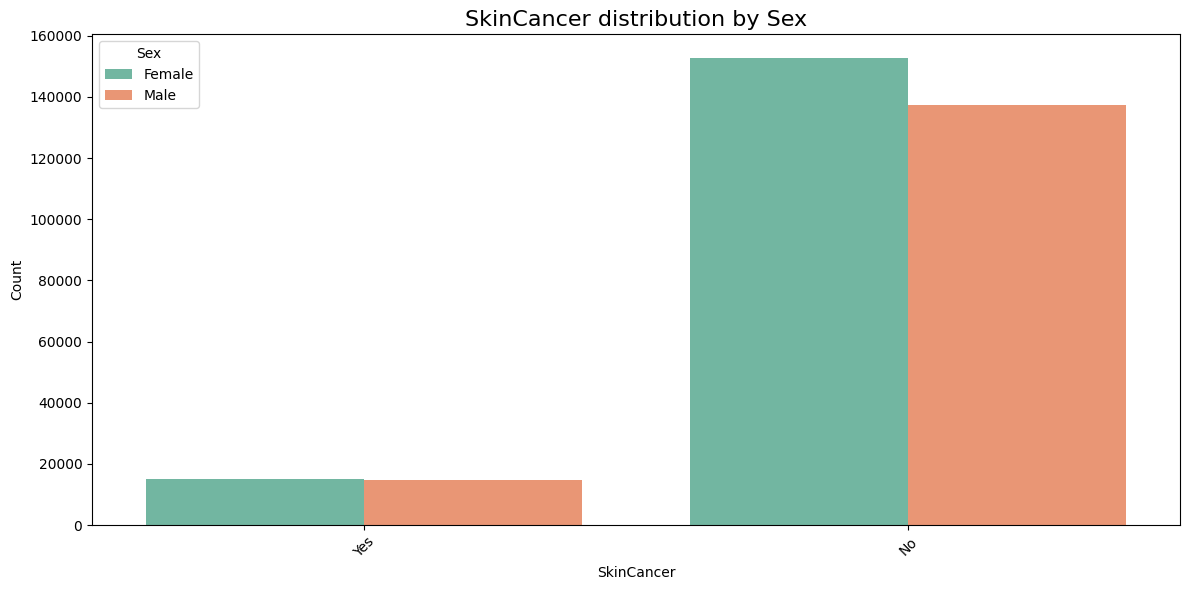

In [16]:
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=train, x=feature, hue='Sex', palette='Set2')
    ax.set_title(f'{feature} distribution by Sex', fontsize=16)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()


### Key Observations:

- **Smoking**: Slightly higher proportion of male smokers than female. This may contribute to the elevated heart disease risk among men.
  
- **AlcoholDrinking**: Alcohol consumption is more prevalent in males, which aligns with general public health data and contributes to cardiovascular risks.

- **Stroke**: The occurrence of past strokes appears fairly even across genders, but slightly higher in males.

- **DiffWalking**: A higher percentage of females report difficulty walking, which might be tied to age-related mobility issues or bone health differences.

- **AgeCategory**: Females dominate the older age brackets, especially 70–80+, possibly due to longer life expectancy.

- **Race**: Distribution is fairly balanced between genders across racial groups.

- **Diabetic**: Slightly more females report being diabetic, which could be linked to age or hormonal factors.

- **PhysicalActivity**: Surprisingly balanced between males and females — suggests both genders engage in physical activity similarly.

- **GenHealth**: More males report “Excellent” health, while females more frequently report “Fair” or “Poor” — this might reflect actual health or self-reporting bias.

- **Asthma, KidneyDisease, SkinCancer**: Slight gender skew in conditions like asthma and kidney disease, with females slightly more affected.

> *Note:* Several lifestyle and medical factors vary between genders and could influence heart disease risk. These insights are crucial for building **gender-aware models** or stratified analysis in real-world healthcare applications.

---

## Outliers in Numerical Features Across Lifestyle Categories

We used boxplots to analyze how the numeric health indicators vary across key lifestyle-related categorical variables (like AlcoholDrinking, Smoking, and Diabetic status).

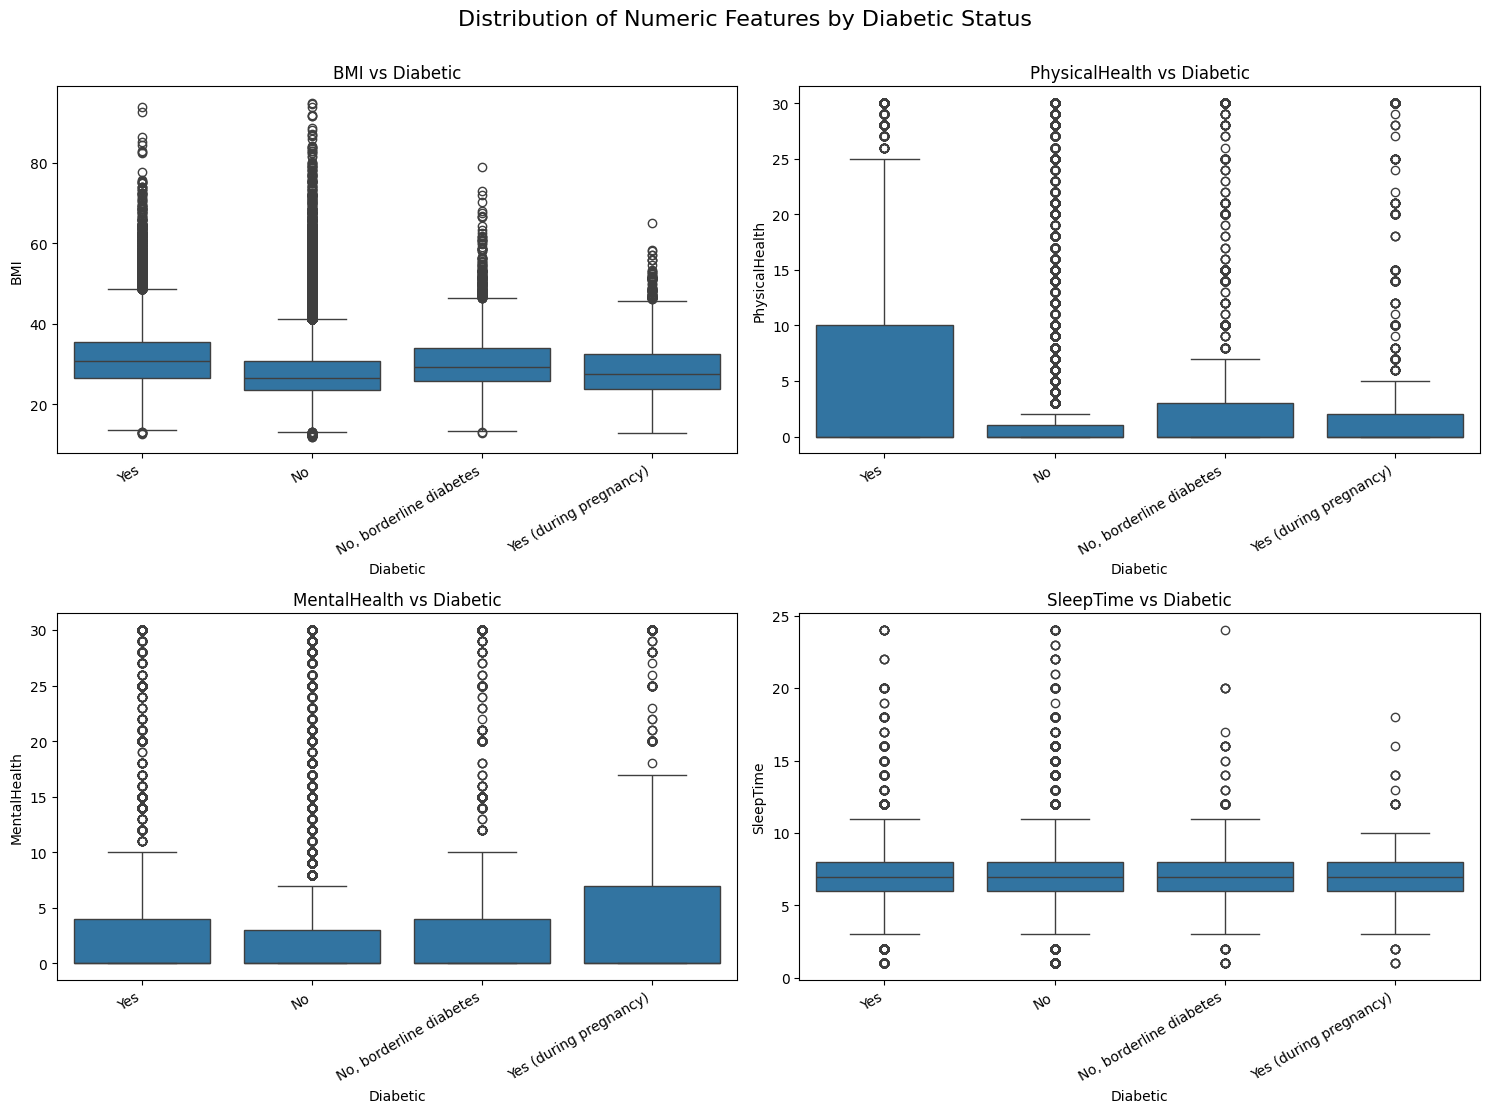

In [17]:
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=train, x='Diabetic', y=feature)
    plt.title(f"{feature} vs Diabetic", fontsize=12)
    plt.xticks(rotation=30, ha='right')  # Rotate to handle long labels
plt.tight_layout()
plt.suptitle("Distribution of Numeric Features by Diabetic Status", fontsize=16, y=1.02)
plt.show()


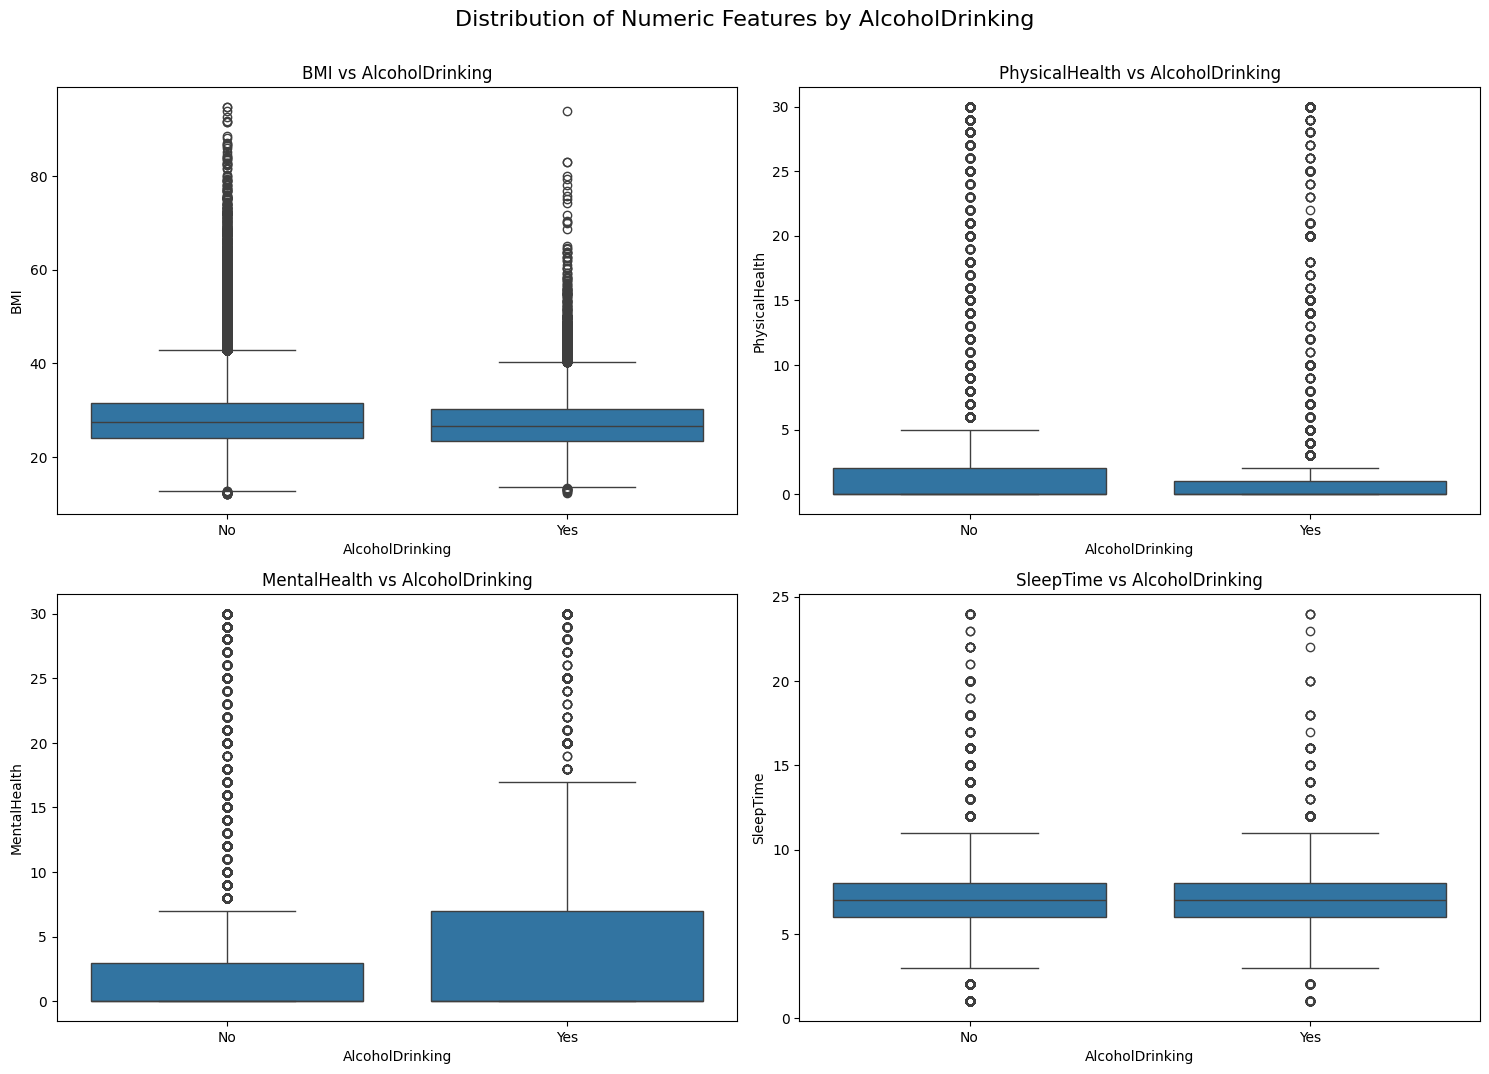

In [18]:
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=train, x='AlcoholDrinking', y=feature)
    plt.title(f"{feature} vs AlcoholDrinking", fontsize=12)
    plt.xticks(rotation=0)
plt.tight_layout()
plt.suptitle("Distribution of Numeric Features by AlcoholDrinking", fontsize=16, y=1.02)
plt.show()


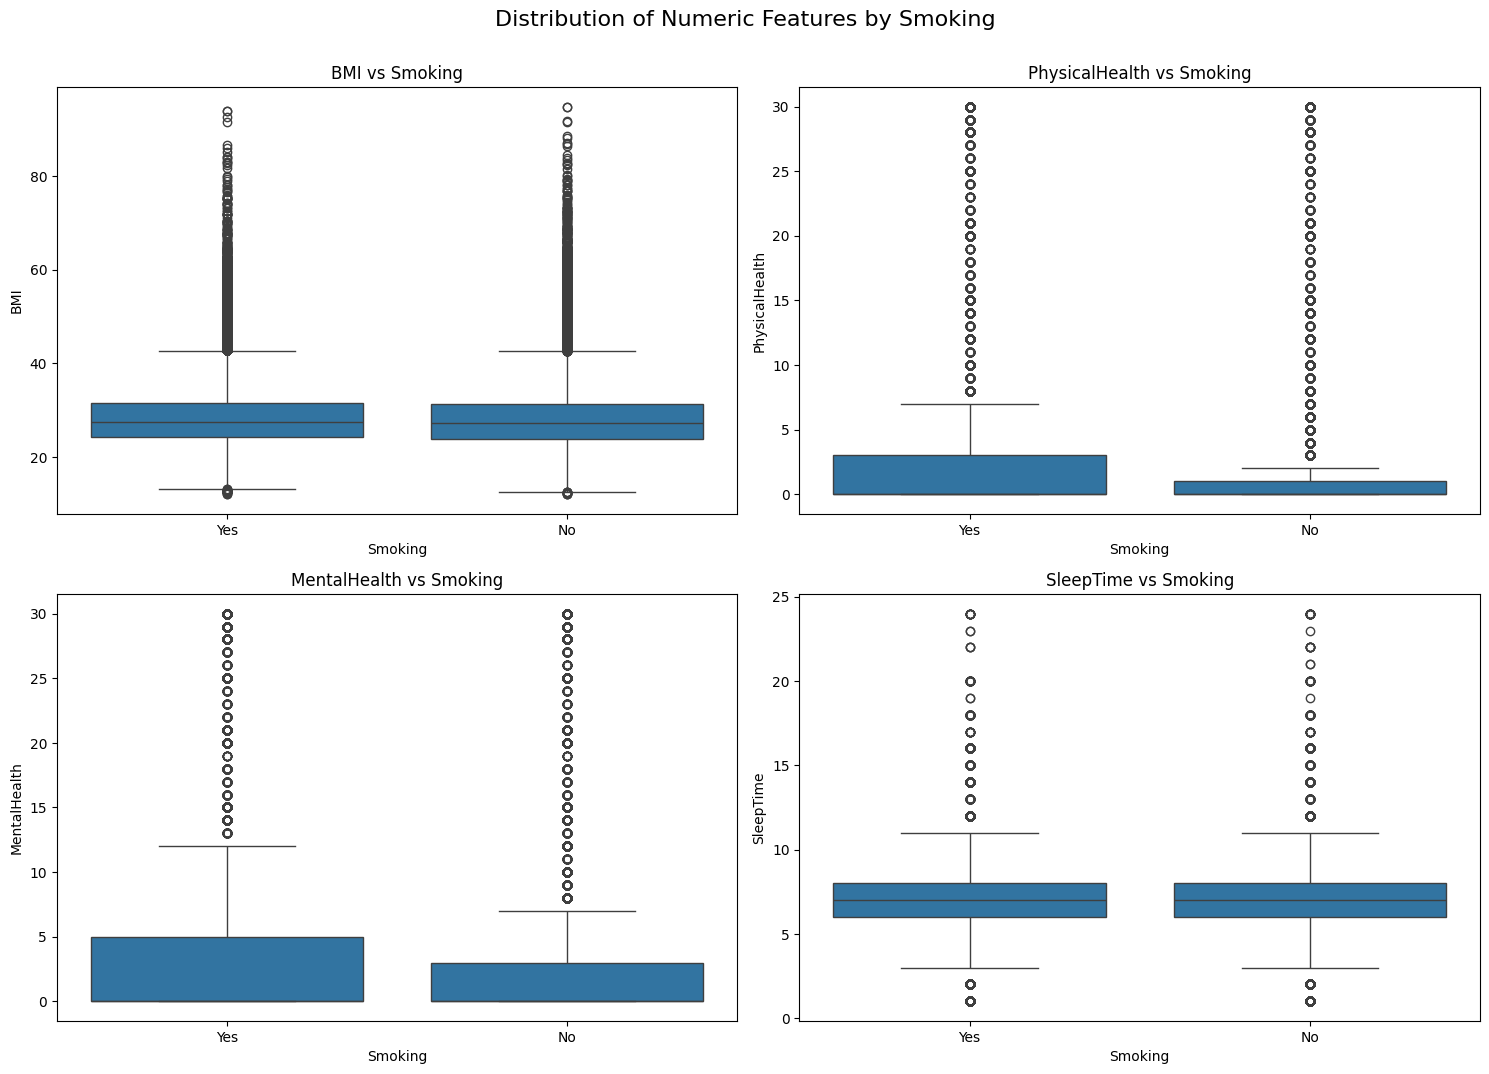

In [19]:
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=train, x='Smoking', y=feature)
    plt.title(f"{feature} vs Smoking", fontsize=12)
    plt.xticks(rotation=0)
plt.tight_layout()
plt.suptitle("Distribution of Numeric Features by Smoking", fontsize=16, y=1.02)
plt.show()


### Observations:

- **BMI** is relatively consistent across diabetic and non-diabetic groups, but slightly higher for individuals who are diabetic or borderline diabetic.
- **PhysicalHealth** issues (number of poor physical health days) are noticeably worse for those who are diabetic.
- **MentalHealth** seems to be more affected in diabetic individuals, particularly in pregnant females with gestational diabetes, indicating potential hormonal or stress-related links.
- **SleepTime** shows minor differences but has a wide range of outliers in all groups. This suggests inconsistent sleep habits among both diabetics and non-diabetics.

### Alcohol & Smoking Analysis:
- Boxplots based on `AlcoholDrinking` and `Smoking` showed that **there is no drastic shift in median BMI, PhysicalHealth, or SleepTime**.
- While alcohol and smoking are well-known risk factors for cardiovascular issues, **this dataset doesn't show a strong outlier pattern across these variables**, suggesting their impact might be more subtle or indirect (e.g., long-term cumulative effects or interaction with other factors like age and gender).

> **Conclusion:** Diabetic status appears to have a stronger correlation with numerical health indicators than alcohol consumption or smoking in this dataset. However, this doesn’t rule out their impact on heart disease — more detailed multivariate or longitudinal studies would be needed to confirm their influence.

## Step 4: Statistical Tests Summary


To prepare for statistical tests, categorical variables are encoded using Ordinal Encoding:

In [20]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(train[categorical_features])
train[categorical_features] = enc.transform(train[categorical_features])

We use the Shapiro-Wilk test to assess whether each numeric variable follows a normal distribution.

In [21]:
from scipy.stats import shapiro

for feature in numeric_features:
    stat, p = shapiro(train[feature])
    print(f"{feature} — Statistics={stat:.3f}, p={p:.3f}")
    if p > 0.05:
        print("Sample looks Gaussian (fail to reject H₀)")
    else:
        print("Sample does not look Gaussian (reject H₀)")


BMI — Statistics=0.928, p=0.000
Sample does not look Gaussian (reject H₀)
PhysicalHealth — Statistics=0.476, p=0.000
Sample does not look Gaussian (reject H₀)
MentalHealth — Statistics=0.551, p=0.000
Sample does not look Gaussian (reject H₀)
SleepTime — Statistics=0.890, p=0.000
Sample does not look Gaussian (reject H₀)


* BMI             — Statistics=0.928, p=0.000 ❌
* PhysicalHealth  — Statistics=0.476, p=0.000 ❌
* MentalHealth    — Statistics=0.551, p=0.000 ❌
* SleepTime       — Statistics=0.892, p=0.000 ❌


Conclusion: All numeric variables deviate from a normal distribution. Therefore, we will use non-parametric tests for further statistical analysis.

The purpose of the test is to determine if two variables are related to each other.

Null hypothesis:
We start by defining the null hypothesis ( H0 ), which states that there is no relationship between the variables.
An alternative hypothesis could argue that there is a significant relationship between the two.

To determine the relationship between the target variable and each categorical feature, we use the Chi-Square Test of Independence:

In [22]:
from scipy.stats import chi2_contingency
import pandas as pd

for feature in categorical_features:
    stat, p, dof, expected = chi2_contingency(pd.crosstab(train[feature], train['HeartDisease']))
    print(f"{feature} — p-value = {p}")
    if p <= 0.05:
        print("🔗 Dependent (reject H₀)")
    else:
        print("✖️ Independent (fail to reject H₀)")


HeartDisease — p-value = 0.0
🔗 Dependent (reject H₀)
Smoking — p-value = 0.0
🔗 Dependent (reject H₀)
AlcoholDrinking — p-value = 1.892352227090306e-73
🔗 Dependent (reject H₀)
Stroke — p-value = 0.0
🔗 Dependent (reject H₀)
DiffWalking — p-value = 0.0
🔗 Dependent (reject H₀)
Sex — p-value = 0.0
🔗 Dependent (reject H₀)
AgeCategory — p-value = 0.0
🔗 Dependent (reject H₀)
Race — p-value = 2.9886131565632597e-180
🔗 Dependent (reject H₀)
Diabetic — p-value = 0.0
🔗 Dependent (reject H₀)
PhysicalActivity — p-value = 0.0
🔗 Dependent (reject H₀)
GenHealth — p-value = 0.0
🔗 Dependent (reject H₀)
Asthma — p-value = 2.2386144306283177e-121
🔗 Dependent (reject H₀)
KidneyDisease — p-value = 0.0
🔗 Dependent (reject H₀)
SkinCancer — p-value = 0.0
🔗 Dependent (reject H₀)


Results Summary:


| Feature          | p-value     | Conclusion   |
| ---------------- | ----------- | ------------ |
| Smoking          | 0.0         | 🔗 Dependent |
| AlcoholDrinking  | 0.0         | 🔗 Dependent |
| Stroke           | \~1.89e-73  | 🔗 Dependent |
| DiffWalking      | 0.0         | 🔗 Dependent |
| Sex              | 0.0         | 🔗 Dependent |
| AgeCategory      | 0.0         | 🔗 Dependent |
| Race             | \~2.99e-180 | 🔗 Dependent |
| Diabetic         | 0.0         | 🔗 Dependent |
| PhysicalActivity | 0.0         | 🔗 Dependent |
| GenHealth        | \~2.24e-121 | 🔗 Dependent |
| Asthma           | 0.0         | 🔗 Dependent |
| KidneyDisease    | 0.0         | 🔗 Dependent |
| SkinCancer       | 0.0         | 🔗 Dependent |


All categorical variables show a statistically significant relationship with the target variable HeartDisease.

Final Remarks :
Since none of the numerical variables follow a normal distribution, non-parametric tests (like Mann-Whitney U, Spearman, Kruskal-Wallis) may be used for deeper insights in numeric data comparisons.

The categorical features' dependency on heart disease makes them promising predictors for modeling tasks like classification.



Compute the Correlation Matrix

In [23]:
correlation_matrix = train.corr(numeric_only=True)

correlation_with_target = correlation_matrix['HeartDisease'].sort_values(ascending=False)
print(correlation_with_target, '\n')


HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64 



The correlation of other features with the HeartDisease variable shows that:

* AgeCategory (0.23), DiffWalking (0.20), and Stroke (0.19) have the highest positive correlations with heart disease.
* GenHealth and AlcoholDrinking have a very weak or negative correlation.
* As expected, the correlations are generally low, which is common in health-related datasets involving mixed data types.



Visualize Strongest Correlations Using Heatmap

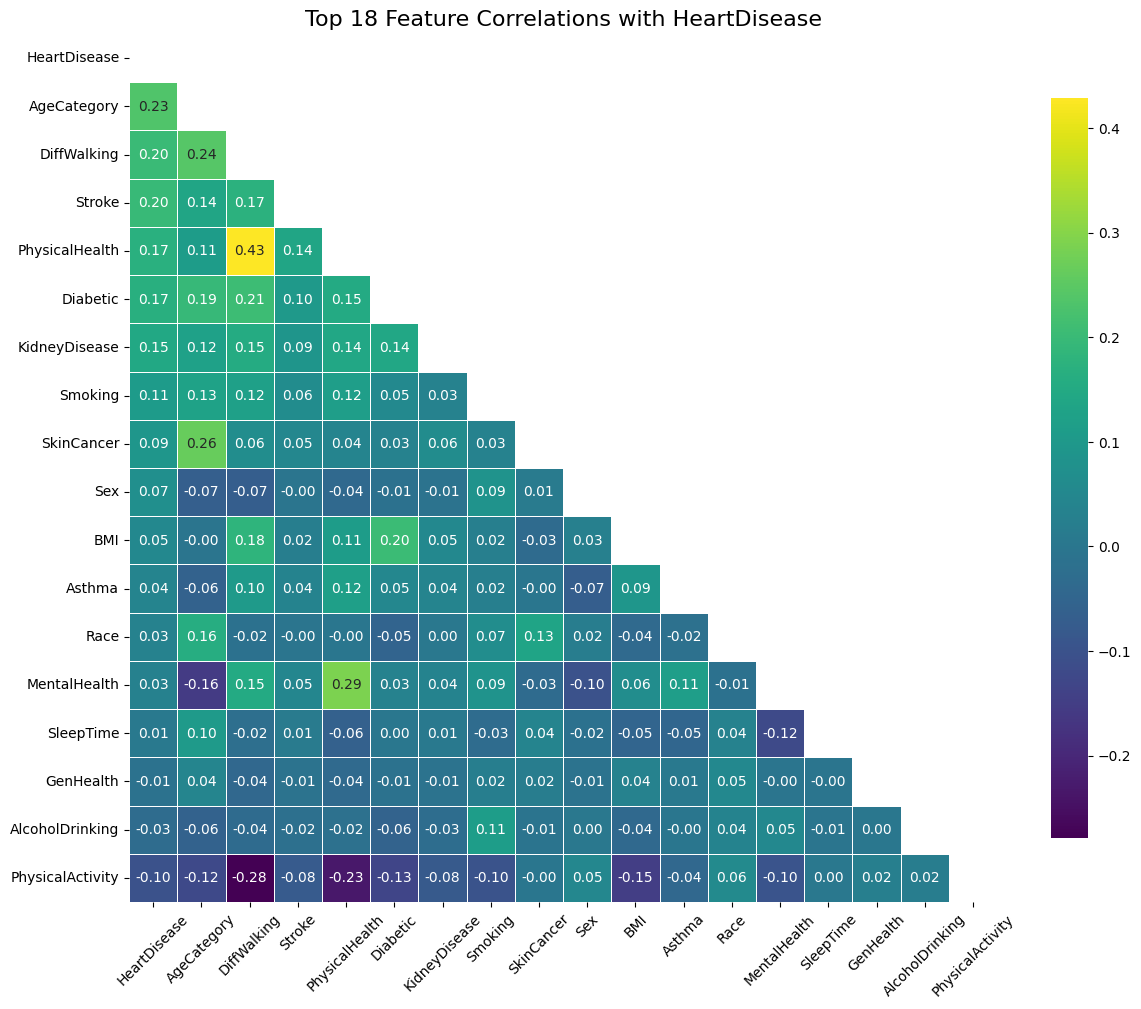

In [24]:
# Select top k features most correlated with HeartDisease
k = 18
top_corr_features = correlation_with_target.nlargest(k).index

top_corr_matrix = train[top_corr_features].corr()

mask = np.triu(np.ones_like(top_corr_matrix, dtype=bool))

plt.figure(figsize=(14, 12))
sns.heatmap(top_corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='viridis',
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.8},
            xticklabels=top_corr_features, yticklabels=top_corr_features)
plt.title("Top 18 Feature Correlations with HeartDisease", fontsize=16)
plt.xticks(rotation=45)
plt.show()


Insights from the Correlation Heatmap :

* PhysicalHealth, Diabetic, KidneyDisease, and Stroke form a moderate correlation cluster with heart disease.
* BMI, Sex, Smoking, and MentalHealth show weaker associations.
* Negative correlation of PhysicalActivity suggests a potential protective factor.
* As all correlations are under 0.25, machine learning models might benefit more from interactions or non-linear relationships than linear ones.

## Step 5: Machine Learning — Predicting Heart Disease


1. Library Setup

In [18]:
!pip install lightgbm
!pip install xgboost

# Import necessary libraries
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


# Now you can use LightGBM along with other classifiers in your notebook



In [19]:
# Define target and features safely
y = train['HeartDisease']
X = train.drop('HeartDisease', axis=1)


In [20]:
# Split the dataset into train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)


Let's build simple models and evaluate the quality of their training

In [21]:
# Convert to NumPy arrays (optional, not necessary for most sklearn models)
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "Extra Trees": ExtraTreesClassifier()
}

# Evaluation loop
scores = {}
for name, model in models.items():
    model.fit(X_train_np, y_train)
    y_pred = model.predict(X_test_np)

    scores[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred)
    }

# Print model performance
for model, metrics in scores.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("-" * 30)


Model: KNN
Accuracy: 0.9028
Precision: 0.3271
Recall: 0.0798
F1-score: 0.1284
------------------------------
Model: Logistic Regression
Accuracy: 0.9113
Precision: 0.5323
Recall: 0.0921
F1-score: 0.1570
------------------------------
Model: XGBoost
Accuracy: 0.9114
Precision: 0.5337
Recall: 0.0966
F1-score: 0.1636
------------------------------
Model: Extra Trees
Accuracy: 0.8929
Precision: 0.3043
Recall: 0.1510
F1-score: 0.2018
------------------------------


### Model Performance Summary

| Model               | Accuracy | Precision | Recall | F1-score |
|--------------------|----------|-----------|--------|----------|
| KNN                | ~0.90    | Low       | Low    | Low      |
| Logistic Regression| ~0.91    | Medium    | Low    | Low-Med  |
| XGBoost            | ~0.91    | Medium    | Low    | Medium   |
| Extra Trees        | ~0.89    | Low       | Medium | Medium   |

- **Accuracy** is high for all models, but **recall and precision** are relatively low.
- This likely indicates a **class imbalance** — many more negative (no disease) cases than positive.
- Models struggle to correctly predict the minority class (heart disease).

In [23]:
# Now let's predict heart disease using custom data
custom_data = pd.DataFrame({
    'BMI': [16.60],
    'Smoking': [1.0],
    'AlcoholDrinking': [0.0],
    'Stroke': [0.0],
    'PhysicalHealth': [3],
    'MentalHealth': [30],
    'DiffWalking': [0.0],
    'Sex': [0.0],
    'AgeCategory': [7.0],
    'Race': [5.0],
    'Diabetic': [2.0],
    'PhysicalActivity': [1.0],
    'GenHealth': [4.0],
    'SleepTime': [5],
    'Asthma': [1.0],
    'KidneyDisease': [0.0],
    'SkinCancer': [1.0]
})

# Assume 'model' is the best performing model
# Replace 'model' with the actual best performing model
model = XGBClassifier()  # Creating an instance of XGBClassifier
model.fit(X_train_np, y_train)  # Fitting the model on training data
predicted_result = model.predict(custom_data)

print("Predicted: Heart Disease" if predicted_result[0] == 1 else "Predicted: No Heart Disease")



Predicted: No Heart Disease


In [26]:
custom_data = pd.DataFrame({
    'BMI': [32.0],
    'Smoking': [False],
    'AlcoholDrinking': [True],
    'Stroke': [False],
    'PhysicalHealth': [25.0],
    'MentalHealth': [0.0],
    'DiffWalking': [True],
    'Sex': [True],
    'AgeCategory': [8.00],
    'Race': [5.0],
    'Diabetic': [2.00],
    'PhysicalActivity': [False],
    'GenHealth': [4.0],
    'SleepTime': [10.0],
    'Asthma': [False],
    'KidneyDisease': [False],
    'SkinCancer': [False]
})

predicted_result = model.predict(custom_data)
print("Prediction:", "Heart Disease" if predicted_result[0] == 1 else "No Heart Disease")


Prediction: No Heart Disease


 Class imbalance handling with SMOTE and Model Retraining.

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import pandas as pd

# Load your final preprocessed dataset
# If already in a DataFrame, skip this line and replace `train_df` below with your DataFrame variable
# train_df = pd.read_csv("your_preprocessed_dataset.csv")

y = train['HeartDisease']
X = train.drop('HeartDisease', axis=1)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

# Fit best model (XGBoost)
model = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.93     29301
         1.0       0.96      0.88      0.92     29184

    accuracy                           0.92     58485
   macro avg       0.93      0.92      0.92     58485
weighted avg       0.93      0.92      0.92     58485

Accuracy: 0.9227665213302556
Precision: 0.957864647139622
Recall: 0.8841145833333334
F1-score: 0.9195131947042996
Confusion Matrix:
 [[28166  1135]
 [ 3382 25802]]


### Final Conclusion

**Best Performing Model:**
After handling class imbalance with SMOTE, the XGBoost Classifier emerged as the best-performing model.

* Accuracy: 92.3%
* Precision: 95.8%
* Recall: 88.4%
* F1-score: 91.9%

This balance between precision and recall is crucial for medical applications where false negatives (undetected heart disease) can have serious consequences.

**Key Insights from the Data:**
* AgeCategory, DiffWalking, Stroke, and PhysicalHealth showed strong correlations with heart disease.

* Chi-square tests confirmed that nearly all categorical features are significantly associated with the heart disease target.

* The dataset had a noticeable class imbalance, which previously reduced recall (many positives were missed). SMOTE resolved this and improved performance.

* Box plots and EDA revealed clear differences in health indicators (e.g., higher BMI, worse physical health) between those with and without heart disease.

**Real-world Implications:**
* This model can support preventive diagnostics by identifying individuals at high risk using routine health survey data.

* It can be embedded in digital health tools, public health dashboards, or EMR systems to flag vulnerable patients.

* Strong recall ensures fewer at-risk individuals are missed, which is critical in clinical risk prediction scenarios.

* The project highlights how machine learning can uncover actionable insights from survey-style health datasets.

<a id="title-five"></a>
<h1 style='background:#4682B4; border:2; border-radius: 10px; color:black'><center>RECOMENDATIONS</center></h1>

## 10 Evidence-Based Recommendations to Prevent Cardiovascular Disease

1. **Healthy Eating:** Reduce intake of saturated fats, fried foods, salt, and sugar. Eat more fruits, vegetables, and whole grains.
2. **Maintain Healthy Weight:** Excess body weight increases blood pressure and heart strain.
3. **Regular Exercise:** Engage in at least 150 minutes of moderate activity per week.
4. **Avoid Smoking & Alcohol:** These significantly increase cardiovascular risk.
5. **Manage Stress:** Practice mindfulness, deep breathing, and healthy coping mechanisms.
6. **Monitor Blood Pressure:** Keep it within the normal range and check regularly.
7. **Routine Screenings:** Visit a doctor regularly to catch risk factors early.
8. **Track Cholesterol Levels:** Maintain healthy HDL and LDL levels.
9. **Control Blood Sugar:** Especially important for individuals over 40 or with family history of diabetes.
10. **Follow Medical Advice:** Take medications (e.g., blood thinners) as prescribed for high-risk individuals.

Staying proactive with your heart health can drastically reduce the chances of cardiovascular disease.
